#Informações do DATA

POSICOES:

G = ?

F = ?

SG = Shooting guard (Armador arremessador - Posição 1)

PG = Point guard (Armador Principal - Posição 2)

SF = Small forward (Ala - Posição 3)

PF = Power forward (Ala-Pivô - posição 4)

C = Center  (Pivô - Posição 5)

---
**Todas as posições do DATASET:**

'G-F', 'SG', 'SF', 'F', 'G', 'F-C', 'PG', 'F-G', 'C', 'PF', 'C-F',
-2, 'PF-C', 'SF-SG', 'C-PF', 'SG-SF', 'PF-SF', 'SF-PF', 'SG-PG',
'SF-PG', 'C-SF', 'PG-SG', 'PG-SF', 'SG-PF'

# Configuração conexao com banco de dados:

## Criação de funcões para conexão com banco de dados

In [ ]:
import psycopg2
import pandas as pd
pd.set_option('display.max_columns', None)
# Connection parameters, yours will be different
param_dic = {
    "host"      : "postgres-sql-pi3.postgres.database.azure.com",
    "database"  : "basquete",
    "user"      : "projetopi3",
    "password"  : "abc@1234"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

In [ ]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

# Crianda Dataframes base de dados

## Conexao com Tabela de Jogadores

In [ ]:
conn = connect(param_dic)
#Pegar o nome das colunas
column_names = ["id","player","height","weight","collage","born","birth_city","birth_state"]
# Execute the "SELECT *" query
df_jogadores = postgresql_to_dataframe(conn, "select * from stg_player", column_names)
df_jogadores.head()

Connecting to the PostgreSQL database...
Connection successful


,id,player,height,weight,collage,born,birth_city,birth_state
0,0.0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,None,None
1,1.0,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2.0,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,None,None
3,3.0,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,None,None
4,4.0,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [ ]:
#df_jogadores.to_csv(f'tb_jogadores.csv', sep=',')

## Conexao com Tabela de Dados dos jogadores

In [ ]:
conn = connect(param_dic)
#Pegar o nome das colunas
column_names = ["player_name","year_start","year_end","player_position","height","weight","birth_date","college"]
# Execute the "SELECT *" query
df_jogadores_dados = postgresql_to_dataframe(conn, "select * from stg_player_data", column_names)
df_jogadores_dados.head()

Connecting to the PostgreSQL database...
Connection successful


,player_name,year_start,year_end,player_position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223,"November 3, 1974",San Jose State University


In [ ]:
#df_jogadores_dados.to_csv(f'tb_jogadores_dados.csv', sep=',')

## Conexao com Tabela de Status por temporada

In [ ]:
conn = connect(param_dic)
#Pegar o nome das colunas
column_names = ["id","ano","player","pos","age","tm","gg","gs","mp","per","ts_percent","threepar","ftr","orb_percent","drb_percent","trb_percent","ast_percent","stl_percent","blk_percent"
                ,"tov_percent","usg_percent","blanl","ows","dws","ws","ws_per_48","blank2","obpm","dbpm","bpm","vorp","fg","fga","fg_percent","threep","threepa","threep_percent"
                ,"twop","twopa","twop_percent","efg_percent","ft","fta","ft_percent","orb","drb","trb","ast","stl","blk","tov","pf","pts"]
# Execute the "SELECT *" query
df_status_sesonais = postgresql_to_dataframe(conn, "select * from stg_season_stats", column_names)
df_status_sesonais.head()

Connecting to the PostgreSQL database...
Connection successful


,id,ano,player,pos,age,tm,gg,gs,mp,per,ts_percent,threepar,ftr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,blanl,ows,dws,ws,ws_per_48,blank2,obpm,dbpm,bpm,vorp,fg,fga,fg_percent,threep,threepa,threep_percent,twop,twopa,twop_percent,efg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63,None,None,None,0.368,None,0.467,None,None,None,None,None,None,None,None,None,-0.1,3.6,3.5,None,None,None,None,None,None,144,516,0.279,None,None,None,144,516,0.279,0.279,170,241,0.705,None,None,None,176,None,None,None,217,458
1,1,1950.0,Cliff Barker,SG,29.0,INO,49,None,None,None,0.435,None,0.387,None,None,None,None,None,None,None,None,None,1.6,0.6,2.2,None,None,None,None,None,None,102,274,0.372,None,None,None,102,274,0.372,0.372,75,106,0.708,None,None,None,109,None,None,None,99,279
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67,None,None,None,0.394,None,0.259,None,None,None,None,None,None,None,None,None,0.9,2.8,3.6,None,None,None,None,None,None,174,499,0.349,None,None,None,174,499,0.349,0.349,90,129,0.698,None,None,None,140,None,None,None,192,438
3,3,1950.0,Ed Bartels,F,24.0,TOT,15,None,None,None,0.312,None,0.395,None,None,None,None,None,None,None,None,None,-0.5,-0.1,-0.6,None,None,None,None,None,None,22,86,0.256,None,None,None,22,86,0.256,0.256,19,34,0.559,None,None,None,20,None,None,None,29,63
4,4,1950.0,Ed Bartels,F,24.0,DNN,13,None,None,None,0.308,None,0.378,None,None,None,None,None,None,None,None,None,-0.5,-0.1,-0.6,None,None,None,None,None,None,21,82,0.256,None,None,None,21,82,0.256,0.256,17,31,0.548,None,None,None,20,None,None,None,27,59


In [ ]:
df_status_sesonais.to_csv(f'tb_status_season.csv', sep=',')

In [ ]:
df_status_sesonais.shape

(24691, 53)

# Análise exploratória

In [ ]:
df_status_sesonais[df_status_sesonais['player'] == 'Stephen Curry']

,id,ano,player,pos,age,tm,gg,gs,mp,per,ts_percent,threepar,ftr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,blanl,ows,dws,ws,ws_per_48,blank2,obpm,dbpm,bpm,vorp,fg,fga,fg_percent,threep,threepa,threep_percent,twop,twopa,twop_percent,efg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
20042,20042,2010.0,Stephen Curry,PG,21.0,GSW,80,77,2896,16.3,0.568,0.332,0.175,1.8,12,6.8,24.6,2.5,0.5,16.5,21.8,None,3,1.6,4.7,0.077,None,1.8,-0.7,1,2.2,528,1143,0.462,166,380,0.437,362,763,0.474,0.535,177,200,0.885,48,308,356,472,152,19,243,252,1399
20656,20654,2011.0,Stephen Curry,PG,22.0,GSW,74,74,2489,19.4,0.595,0.325,0.216,2.3,10.9,6.5,28.1,2.2,0.6,16.4,24.4,None,5.4,1.3,6.6,0.128,None,3.5,-1.6,1.9,2.4,505,1053,0.48,151,342,0.442,354,711,0.498,0.551,212,227,0.934,52,234,286,432,109,20,226,233,1373
21240,21236,2012.0,Stephen Curry,PG,23.0,GSW,26,23,732,21.2,0.605,0.409,0.159,2.3,11.3,6.8,32.3,2.8,0.8,17,24,None,1.8,0.4,2.2,0.144,None,4.7,-1.3,3.4,1,145,296,0.49,55,121,0.455,90,175,0.514,0.583,38,47,0.809,15,73,88,138,39,8,65,62,383
21804,21798,2013.0,Stephen Curry,PG,24.0,GSW,78,78,2983,21.3,0.589,0.432,0.21,2.3,9.1,5.8,31.1,2.1,0.3,13.7,26.4,None,8.4,2.8,11.2,0.18,None,6.3,-0.9,5.4,5.6,626,1388,0.451,272,600,0.453,354,788,0.449,0.549,262,291,0.9,59,255,314,539,126,12,240,198,1786
22406,22402,2014.0,Stephen Curry,PG,25.0,GSW,78,78,2846,24.1,0.61,0.445,0.252,1.8,10.9,6.4,39.9,2.2,0.4,16.1,28.3,None,9.3,4,13.4,0.225,None,7.4,0,7.4,6.7,652,1383,0.471,261,615,0.424,391,768,0.509,0.566,308,348,0.885,46,288,334,666,128,14,294,194,1873
23003,23000,2015.0,Stephen Curry,PG,26.0,GSW,80,80,2613,28,0.638,0.482,0.251,2.4,11.4,7,38.6,3,0.5,14.3,28.9,None,11.5,4.1,15.7,0.288,None,9.6,0.3,9.9,7.9,653,1341,0.487,286,646,0.443,367,695,0.528,0.594,308,337,0.914,56,285,341,619,163,16,249,158,1900
23635,23633,2016.0,Stephen Curry,PG,27.0,GSW,79,79,2700,31.5,0.669,0.554,0.25,2.9,13.6,8.6,33.7,3,0.4,12.9,32.6,None,13.8,4.1,17.9,0.318,None,12.4,0.1,12.5,9.8,805,1598,0.504,402,886,0.454,403,712,0.566,0.63,363,400,0.908,68,362,430,527,169,15,262,161,2375
24218,24216,2017.0,Stephen Curry,PG,28.0,GSW,79,79,2638,24.6,0.624,0.547,0.251,2.7,11.4,7.3,31.1,2.6,0.5,13,30.1,None,8.6,3.9,12.6,0.229,None,7.7,-0.4,7.3,6.2,675,1443,0.468,324,789,0.411,351,654,0.537,0.58,325,362,0.898,61,292,353,523,143,17,239,183,1999


## Verificação de valores nulos

In [ ]:
#df_ano_especifico = df_status_sesonais[df_status_sesonais['ano'] >= 1990]
selecao_nulos = pd.DataFrame(df_status_sesonais.isnull().sum(), columns = ['Resultado'])
selecao_nulos.query('Resultado > 0')

,Resultado
ano,67
player,67
pos,67
age,75
tm,67
gg,67
gs,6458
mp,553
per,590
ts_percent,153


## Tratamentos dos valores Null e tipos das colunas ANO e IDADE
Os números foram transformados nos valores null em -2, no caso, se refere a valores não informados no dataset.

### Metodo 1: Colocando com valores -2 (Não informado)

In [ ]:
'''
df_status_sesonais_v1 = df_status_sesonais.fillna(value=-2)
df_status_sesonais_v1.head()
'''

'\ndf_status_sesonais_v1 = df_status_sesonais.fillna(value=-2)\ndf_status_sesonais_v1.head()\n'

**Resultado**

In [ ]:
'''
selecao_nulos = pd.DataFrame(df_status_sesonais_v1.isnull().sum(), columns = ['Resultado'])
selecao_nulos.query('Resultado > 0')
'''

"\nselecao_nulos = pd.DataFrame(df_status_sesonais_v1.isnull().sum(), columns = ['Resultado'])\nselecao_nulos.query('Resultado > 0')\n"

### Metodo 2: Preencher valores ausentes com a mediana da coluna

#### Substituindo os valores vazios pela media da coluna

In [ ]:
# Preenchendo os valores nulos com as medianas das colunas:
# 1- Extrair a mediana da coluna
# 2- Preencher a coluna com os valores null com a mediana
# 3- Chegar se há mais algum valor ausente

#AGE:
coluna_mediana = int(df_status_sesonais['age'].median())
df_status_sesonais['age'].fillna(coluna_mediana, inplace= True)


#GG:
gg_mediana = df_status_sesonais['gg'].median()
df_status_sesonais['gg'].fillna(gg_mediana, inplace= True)

#gs:
gs_mediana = df_status_sesonais['gs'].median()
df_status_sesonais['gs'].fillna(gs_mediana, inplace= True)

#mp:
mp_mediana = df_status_sesonais['mp'].median()
df_status_sesonais['mp'].fillna(mp_mediana, inplace= True)

#per:
per_mediana = df_status_sesonais['per'].median()
df_status_sesonais['per'].fillna(per_mediana, inplace= True)

#ts_percent:
ts_percent_mediana = df_status_sesonais['ts_percent'].median()
df_status_sesonais['ts_percent'].fillna(ts_percent_mediana, inplace= True)

#threepar:
threepar_mediana = df_status_sesonais['threepar'].median()
df_status_sesonais['threepar'].fillna(threepar_mediana, inplace= True)

#ftr:
ftr_mediana = df_status_sesonais['ftr'].median()
df_status_sesonais['ftr'].fillna(ftr_mediana, inplace= True)

#orb_percent:
orb_percent_mediana = df_status_sesonais['orb_percent'].median()
df_status_sesonais['orb_percent'].fillna(orb_percent_mediana, inplace= True)

#drb_percent:
drb_percent_mediana = df_status_sesonais['drb_percent'].median()
df_status_sesonais['drb_percent'].fillna(drb_percent_mediana, inplace= True)

#trb_percent:
trb_percent_mediana = df_status_sesonais['trb_percent'].median()
df_status_sesonais['trb_percent'].fillna(trb_percent_mediana, inplace= True)

#ast_percent:
ast_percent_mediana = df_status_sesonais['ast_percent'].median()
df_status_sesonais['ast_percent'].fillna(ast_percent_mediana, inplace= True)

#stl_percent:
stl_percent_mediana = df_status_sesonais['stl_percent'].median()
df_status_sesonais['stl_percent'].fillna(stl_percent_mediana, inplace= True)

#blk_percent:
blk_percent_mediana = df_status_sesonais['blk_percent'].median()
df_status_sesonais['blk_percent'].fillna(blk_percent_mediana, inplace= True)

#tov_percent:
tov_percent_mediana = df_status_sesonais['tov_percent'].median()
df_status_sesonais['tov_percent'].fillna(tov_percent_mediana, inplace= True)

#usg_percent:
usg_percent_mediana = df_status_sesonais['usg_percent'].median()
df_status_sesonais['usg_percent'].fillna(usg_percent_mediana, inplace= True)

#ows:
ows_mediana = df_status_sesonais['ows'].median()
df_status_sesonais['ows'].fillna(ows_mediana, inplace= True)

#dws:
dws_mediana = df_status_sesonais['dws'].median()
df_status_sesonais['dws'].fillna(dws_mediana, inplace= True)

#ws:
ws_mediana = df_status_sesonais['ws'].median()
df_status_sesonais['ws'].fillna(ws_mediana, inplace= True)

#ws_per_48:
ws_per_48_mediana = df_status_sesonais['ws_per_48'].median()
df_status_sesonais['ws_per_48'].fillna(ws_per_48_mediana, inplace= True)

#obpm:
obpm_mediana = df_status_sesonais['obpm'].median()
df_status_sesonais['obpm'].fillna(obpm_mediana, inplace= True)

#dbpm:
dbpm_mediana = df_status_sesonais['dbpm'].median()
df_status_sesonais['dbpm'].fillna(dbpm_mediana, inplace= True)

#bpm:
bpm_mediana = df_status_sesonais['bpm'].median()
df_status_sesonais['bpm'].fillna(bpm_mediana, inplace= True)

#vorp:
coluna_mediana = df_status_sesonais['vorp'].median()
df_status_sesonais['vorp'].fillna(coluna_mediana, inplace= True)

#fg:
coluna_mediana = df_status_sesonais['fg'].median()
df_status_sesonais['fg'].fillna(coluna_mediana, inplace= True)

#fga:
coluna_mediana = df_status_sesonais['fga'].median()
df_status_sesonais['fga'].fillna(coluna_mediana, inplace= True)

#fg_percent:
coluna_mediana = df_status_sesonais['fg_percent'].median()
df_status_sesonais['fg_percent'].fillna(coluna_mediana, inplace= True)

#threep:
coluna_mediana = df_status_sesonais['threep'].median()
df_status_sesonais['threep'].fillna(coluna_mediana, inplace= True)

#threepa:
coluna_mediana = df_status_sesonais['threepa'].median()
df_status_sesonais['threepa'].fillna(coluna_mediana, inplace= True)

#threep_percent:
coluna_mediana = df_status_sesonais['threep_percent'].median()
df_status_sesonais['threep_percent'].fillna(coluna_mediana, inplace= True)

#twop:
coluna_mediana = df_status_sesonais['twop'].median()
df_status_sesonais['twop'].fillna(coluna_mediana, inplace= True)

#twopa:
coluna_mediana = df_status_sesonais['twopa'].median()
df_status_sesonais['twopa'].fillna(coluna_mediana, inplace= True)

#twop_percent:
coluna_mediana = df_status_sesonais['twop_percent'].median()
df_status_sesonais['twop_percent'].fillna(coluna_mediana, inplace= True)

#efg_percent:
coluna_mediana = df_status_sesonais['efg_percent'].median()
df_status_sesonais['efg_percent'].fillna(coluna_mediana, inplace= True)

#ft:
coluna_mediana = df_status_sesonais['ft'].median()
df_status_sesonais['ft'].fillna(coluna_mediana, inplace= True)

#fta:
coluna_mediana = df_status_sesonais['fta'].median()
df_status_sesonais['fta'].fillna(coluna_mediana, inplace= True)

#ft_percent:
coluna_mediana = df_status_sesonais['ft_percent'].median()
df_status_sesonais['ft_percent'].fillna(coluna_mediana, inplace= True)

#orb:
coluna_mediana = df_status_sesonais['orb'].median()
df_status_sesonais['orb'].fillna(coluna_mediana, inplace= True)

#drb:
coluna_mediana = df_status_sesonais['drb'].median()
df_status_sesonais['drb'].fillna(coluna_mediana, inplace= True)

#trb:
coluna_mediana = df_status_sesonais['trb'].median()
df_status_sesonais['trb'].fillna(coluna_mediana, inplace= True)

#ast:
coluna_mediana = df_status_sesonais['ast'].median()
df_status_sesonais['ast'].fillna(coluna_mediana, inplace= True)

#stl:
coluna_mediana = df_status_sesonais['stl'].median()
df_status_sesonais['stl'].fillna(coluna_mediana, inplace= True)

#blk:
coluna_mediana = df_status_sesonais['blk'].median()
df_status_sesonais['blk'].fillna(coluna_mediana, inplace= True)

#tov:
coluna_mediana = df_status_sesonais['tov'].median()
df_status_sesonais['tov'].fillna(coluna_mediana, inplace= True)

#pf:
coluna_mediana = df_status_sesonais['pf'].median()
df_status_sesonais['pf'].fillna(coluna_mediana, inplace= True)

#pts:
coluna_mediana = df_status_sesonais['pts'].median()
df_status_sesonais['pts'].fillna(coluna_mediana, inplace= True)


df_status_sesonais_v1 = df_status_sesonais.copy()


In [ ]:
# Imprimindo o resultado para verificação da remoção
selecao_nulos = pd.DataFrame(df_status_sesonais_v1.isnull().sum(), columns = ['Resultado'])
selecao_nulos.query('Resultado > 0')

,Resultado
ano,67
player,67
pos,67
tm,67
blanl,24691
blank2,24691


#### Retirada dos registros que não possuem dados de  **anos**, **jodadores (player)**, **times (tm)** e **posicao (pos)** E retirada das colunas blank2, blanl que não possuem informações

In [ ]:
df_status_sesonais_v1 = df_status_sesonais_v1.drop(columns=['blank2', 'blanl'])

In [ ]:
df_status_sesonais_v1 = df_status_sesonais_v1.dropna(axis=0)

In [ ]:
# Imprimindo o resultado para verificação da remoção
selecao_nulos = pd.DataFrame(df_status_sesonais_v1.isnull().sum(), columns = ['Resultado'])
selecao_nulos.query('Resultado > 0')

,Resultado


## Tratamento das colunas **ANO** e **IDADE** de **Double** para **INT**

In [ ]:
df_status_sesonais_v1['ano'] = df_status_sesonais_v1['ano'].astype('int64')
df_status_sesonais_v1['age'] = df_status_sesonais_v1['age'].astype('int64')
df_status_sesonais_v1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,ano,player,pos,age,tm,gg,gs,mp,per,ts_percent,threepar,ftr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,fg,fga,fg_percent,threep,threepa,threep_percent,twop,twopa,twop_percent,efg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0,1950,Curly Armstrong,G-F,31,FTW,63,8.0,1053.0,12.7,0.368,0.064,0.467,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-0.1,3.6,3.5,0.075,-1.5,-0.5,-1.8,0.0,144,516,0.279,2.0,11.0,0.292,144,516,0.279,0.279,170,241,0.705,38.0,106.0,159.0,176,29.0,11.0,55.0,217,458
1,1,1950,Cliff Barker,SG,29,INO,49,8.0,1053.0,12.7,0.435,0.064,0.387,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,1.6,0.6,2.2,0.075,-1.5,-0.5,-1.8,0.0,102,274,0.372,2.0,11.0,0.292,102,274,0.372,0.372,75,106,0.708,38.0,106.0,159.0,109,29.0,11.0,55.0,99,279
2,2,1950,Leo Barnhorst,SF,25,CHS,67,8.0,1053.0,12.7,0.394,0.064,0.259,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,0.9,2.8,3.6,0.075,-1.5,-0.5,-1.8,0.0,174,499,0.349,2.0,11.0,0.292,174,499,0.349,0.349,90,129,0.698,38.0,106.0,159.0,140,29.0,11.0,55.0,192,438
3,3,1950,Ed Bartels,F,24,TOT,15,8.0,1053.0,12.7,0.312,0.064,0.395,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-0.5,-0.1,-0.6,0.075,-1.5,-0.5,-1.8,0.0,22,86,0.256,2.0,11.0,0.292,22,86,0.256,0.256,19,34,0.559,38.0,106.0,159.0,20,29.0,11.0,55.0,29,63
4,4,1950,Ed Bartels,F,24,DNN,13,8.0,1053.0,12.7,0.308,0.064,0.378,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-0.5,-0.1,-0.6,0.075,-1.5,-0.5,-1.8,0.0,21,82,0.256,2.0,11.0,0.292,21,82,0.256,0.256,17,31,0.548,38.0,106.0,159.0,20,29.0,11.0,55.0,27,59


## Renomeação de colunas

In [ ]:
df_status_sesonais_v2 = df_status_sesonais_v1.rename(columns = {'player':'jogador', 
                                                                'age':'idade', 
                                                                'ts_percent':'ts%', 
                                                                'orb_percent':'orb%', 
                                                                'drb_percent':'drb%', 
                                                                'trb_percent':'trb%', 
                                                                'ast_percent':'ast%', 
                                                                'stl_percent':'stl%',
                                                                'blk_percent':'blk%',
                                                                'tov_percent':'tov%',
                                                                'usg_percent':'usg%',
                                                                'ws_per_48':'ws%48%',
                                                                'fg_percent':'fg%',
                                                                'efg_percent':'efg%',
                                                                'ft_percent':'ft%', 
                                                                'threep_percent':'threep%',
                                                                'twop_percent':'twop%',
                                                                })
df_status_sesonais_v2.head()

,id,ano,jogador,pos,idade,tm,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws%48%,obpm,dbpm,bpm,vorp,fg,fga,fg%,threep,threepa,threep%,twop,twopa,twop%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0,1950,Curly Armstrong,G-F,31,FTW,63,8.0,1053.0,12.7,0.368,0.064,0.467,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-0.1,3.6,3.5,0.075,-1.5,-0.5,-1.8,0.0,144,516,0.279,2.0,11.0,0.292,144,516,0.279,0.279,170,241,0.705,38.0,106.0,159.0,176,29.0,11.0,55.0,217,458
1,1,1950,Cliff Barker,SG,29,INO,49,8.0,1053.0,12.7,0.435,0.064,0.387,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,1.6,0.6,2.2,0.075,-1.5,-0.5,-1.8,0.0,102,274,0.372,2.0,11.0,0.292,102,274,0.372,0.372,75,106,0.708,38.0,106.0,159.0,109,29.0,11.0,55.0,99,279
2,2,1950,Leo Barnhorst,SF,25,CHS,67,8.0,1053.0,12.7,0.394,0.064,0.259,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,0.9,2.8,3.6,0.075,-1.5,-0.5,-1.8,0.0,174,499,0.349,2.0,11.0,0.292,174,499,0.349,0.349,90,129,0.698,38.0,106.0,159.0,140,29.0,11.0,55.0,192,438
3,3,1950,Ed Bartels,F,24,TOT,15,8.0,1053.0,12.7,0.312,0.064,0.395,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-0.5,-0.1,-0.6,0.075,-1.5,-0.5,-1.8,0.0,22,86,0.256,2.0,11.0,0.292,22,86,0.256,0.256,19,34,0.559,38.0,106.0,159.0,20,29.0,11.0,55.0,29,63
4,4,1950,Ed Bartels,F,24,DNN,13,8.0,1053.0,12.7,0.308,0.064,0.378,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-0.5,-0.1,-0.6,0.075,-1.5,-0.5,-1.8,0.0,21,82,0.256,2.0,11.0,0.292,21,82,0.256,0.256,17,31,0.548,38.0,106.0,159.0,20,29.0,11.0,55.0,27,59


In [ ]:
#df_status_sesonais_v2.to_csv('jogadores_sem_agrupamento.csv', sep=',')

# TESTE

In [ ]:
df_one_hot = df_status_sesonais_v2.copy()

In [ ]:
onehot_colunas = ['pos']
df_one_hot = df_one_hot[onehot_colunas]
df_one_hot.head()

,pos
0,G-F
1,SG
2,SF
3,F
4,F


In [ ]:
df_one_hot = pd.get_dummies(df_one_hot, drop_first= False)
df_one_hot = df_one_hot.astype('int')
df_one_hot.head()

,pos_C,pos_C-F,pos_C-PF,pos_C-SF,pos_F,pos_F-C,pos_F-G,pos_G,pos_G-F,pos_PF,pos_PF-C,pos_PF-SF,pos_PG,pos_PG-SF,pos_PG-SG,pos_SF,pos_SF-PF,pos_SF-PG,pos_SF-SG,pos_SG,pos_SG-PF,pos_SG-PG,pos_SG-SF
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
col_one_hot = df_one_hot.keys()
col_one_hot


Index(['pos_C', 'pos_C-F', 'pos_C-PF', 'pos_C-SF', 'pos_F', 'pos_F-C',
       'pos_F-G', 'pos_G', 'pos_G-F', 'pos_PF', 'pos_PF-C', 'pos_PF-SF',
       'pos_PG', 'pos_PG-SF', 'pos_PG-SG', 'pos_SF', 'pos_SF-PF', 'pos_SF-PG',
       'pos_SF-SG', 'pos_SG', 'pos_SG-PF', 'pos_SG-PG', 'pos_SG-SF'],
      dtype='object')

## Visualização da distribuição dos dados númericos

### Retirando colunas não númericas para visualização da distribuição dos dados

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df_status_sesonais_v2.drop(["ano"], axis=1, inplace=True)
df_status_sesonais_v2.drop(["pos"], axis=1, inplace=True)
df_status_sesonais_v2.drop(["id"], axis=1, inplace=True)
df_status_sesonais_v2.drop(["tm"], axis=1, inplace=True)

df_status_sesonais_v2

,jogador,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws%48%,obpm,dbpm,bpm,vorp,fg,fga,fg%,threep,threepa,threep%,twop,twopa,twop%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Curly Armstrong,31,63,8.0,1053.0,12.7,0.368,0.064,0.467,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-0.1,3.6,3.5,0.075,-1.5,-0.5,-1.8,0.0,144,516,0.279,2.0,11.0,0.292,144,516,0.279,0.279,170,241,0.705,38.0,106.0,159.0,176,29.0,11.0,55.0,217,458
1,Cliff Barker,29,49,8.0,1053.0,12.7,0.435,0.064,0.387,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,1.6,0.6,2.2,0.075,-1.5,-0.5,-1.8,0.0,102,274,0.372,2.0,11.0,0.292,102,274,0.372,0.372,75,106,0.708,38.0,106.0,159.0,109,29.0,11.0,55.0,99,279
2,Leo Barnhorst,25,67,8.0,1053.0,12.7,0.394,0.064,0.259,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,0.9,2.8,3.6,0.075,-1.5,-0.5,-1.8,0.0,174,499,0.349,2.0,11.0,0.292,174,499,0.349,0.349,90,129,0.698,38.0,106.0,159.0,140,29.0,11.0,55.0,192,438
3,Ed Bartels,24,15,8.0,1053.0,12.7,0.312,0.064,0.395,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-0.5,-0.1,-0.6,0.075,-1.5,-0.5,-1.8,0.0,22,86,0.256,2.0,11.0,0.292,22,86,0.256,0.256,19,34,0.559,38.0,106.0,159.0,20,29.0,11.0,55.0,29,63
4,Ed Bartels,24,13,8.0,1053.0,12.7,0.308,0.064,0.378,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-0.5,-0.1,-0.6,0.075,-1.5,-0.5,-1.8,0.0,21,82,0.256,2.0,11.0,0.292,21,82,0.256,0.256,17,31,0.548,38.0,106.0,159.0,20,29.0,11.0,55.0,27,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,Cody Zeller,24,62,58,1725,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3,10.9,15.5,3.4,2.2,5.6,0.157,-0.2,2.3,2.1,1.8,253,443,0.571,0,1,0,253,442,0.572,0.571,133,196,0.679,135,270,405,99,62,58,65,189,639
24687,Tyler Zeller,27,51,5,525,13,0.508,0.006,0.247,9.2,17,13.2,12.2,0.7,3.3,10.2,16.5,0.5,0.6,1,0.094,-3.2,0.8,-2.5,-0.1,78,158,0.494,0,1,0,78,157,0.497,0.494,22,39,0.564,43,81,124,42,7,21,20,61,178
24688,Stephen Zimmerman,20,19,0,108,7.3,0.346,0,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-0.1,0.1,0,-0.005,-7.8,0.4,-7.3,-0.1,10,31,0.323,0,0,0.292,10,31,0.323,0.323,3,5,0.6,11,24,35,4,2,5,3,17,23
24689,Paul Zipser,22,44,18,843,6.9,0.503,0.448,0.181,1.9,14.2,8,6.1,0.9,1.5,14.4,14.4,-0.3,0.8,0.5,0.03,-3.6,-0.1,-3.7,-0.4,88,221,0.398,33,99,0.333,55,122,0.451,0.473,31,40,0.775,15,110,125,36,15,16,40,78,240


In [ ]:
df_posicao = pd.concat([df_status_sesonais_v2['jogador'], df_one_hot], axis=1)
df_posicao = df_posicao.groupby(['jogador']).sum()
#df_teste2 = df_teste2.reset_index()
for coluna in df_posicao.keys():
    df_posicao[coluna].mask(df_posicao[coluna] > 1, 1, inplace=True)
#df_posicao = df_posicao.reset_index()
df_posicao.shape

(3921, 23)

In [ ]:
# Realizando a mudança de Object para Float

for coluna in df_status_sesonais_v2.keys():
    if(coluna != 'jogador' and coluna != 'idade'):
        df_status_sesonais_v2[coluna] = df_status_sesonais_v2[coluna].astype('float64')
        
df_status_sesonais_v2.shape

(24624, 47)

In [ ]:
df_status_sesonais_v2 = df_status_sesonais_v2.groupby(["jogador"]).mean()
df_status_sesonais_v2['idade'] = df_status_sesonais_v2['idade'].round().astype('int32')
df_status_sesonais_v2.head()

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws%48%,obpm,dbpm,bpm,vorp,fg,fga,fg%,threep,threepa,threep%,twop,twopa,twop%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
jogador,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.C. Green,30,75.611111,50.277778,2169.111111,13.872222,0.543556,0.049,0.437111,10.388889,18.811111,14.655556,5.216667,1.438889,0.85,11.488889,14.405556,3.372222,2.416667,5.788889,0.122111,-0.505556,0.422222,-0.083333,1.277778,265.444444,538.111111,0.487667,6.944444,28.277778,0.146833,258.5,509.833333,0.501889,0.493167,180.388889,247.055556,0.708056,198.666667,364.055556,562.722222,81.611111,61.277778,31.222222,83.777778,143.388889,718.222222
A.J. Bramlett,23,8.000000,0.000000,61.000000,-0.400000,0.190000,0.000,0.000000,21.700000,18.500000,20.100000,0.000000,0.800000,0.00,12.500000,17.100000,-0.200000,0.100000,-0.200000,-0.129000,-10.500000,-6.300000,-16.800000,-0.200000,4.000000,21.000000,0.190000,0.000000,0.000000,0.292000,4.0,21.000000,0.190000,0.190000,0.000000,0.000000,0.743000,12.000000,10.000000,22.000000,0.000000,1.000000,0.000000,3.000000,13.000000,8.000000
A.J. English,24,75.500000,9.000000,1554.000000,11.550000,0.480000,0.047,0.241000,4.900000,6.250000,5.550000,15.850000,0.900000,0.45,11.950000,23.700000,-0.200000,0.700000,0.550000,0.016500,-2.250000,-2.850000,-5.100000,-1.200000,308.500000,709.000000,0.436000,4.500000,32.500000,0.136500,304.0,676.500000,0.450500,0.438500,129.500000,166.500000,0.774000,70.000000,87.500000,157.500000,160.000000,28.500000,12.000000,101.500000,143.500000,751.000000
A.J. Guyton,23,26.666667,4.666667,415.333333,4.366667,0.324000,0.371,0.068333,1.366667,3.800000,2.533333,23.466667,2.466667,0.50,14.433333,20.766667,0.100000,-0.033333,0.100000,-0.141333,-6.066667,-4.933333,-11.000000,-0.333333,55.333333,146.666667,0.255667,24.333333,64.333333,0.255000,31.0,82.333333,0.254000,0.310667,12.333333,15.000000,0.797000,7.333333,19.333333,26.666667,49.000000,6.666667,4.000000,20.666667,19.333333,147.333333
A.J. Hammons,24,22.000000,0.000000,163.000000,8.400000,0.472000,0.238,0.476000,5.400000,20.900000,12.800000,3.800000,0.300000,7.20,16.400000,17.600000,-0.200000,0.200000,0.000000,-0.001000,-7.500000,1.900000,-5.600000,-0.100000,17.000000,42.000000,0.405000,5.000000,10.000000,0.500000,12.0,32.000000,0.375000,0.464000,9.000000,20.000000,0.450000,8.000000,28.000000,36.000000,4.000000,1.000000,13.000000,10.000000,21.000000,48.000000


In [ ]:
df_com_posicao = pd.concat([df_status_sesonais_v2, df_posicao], axis=1)
df_com_posicao.head()

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws%48%,obpm,dbpm,bpm,vorp,fg,fga,fg%,threep,threepa,threep%,twop,twopa,twop%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,pos_C,pos_C-F,pos_C-PF,pos_C-SF,pos_F,pos_F-C,pos_F-G,pos_G,pos_G-F,pos_PF,pos_PF-C,pos_PF-SF,pos_PG,pos_PG-SF,pos_PG-SG,pos_SF,pos_SF-PF,pos_SF-PG,pos_SF-SG,pos_SG,pos_SG-PF,pos_SG-PG,pos_SG-SF
jogador,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.C. Green,30,75.611111,50.277778,2169.111111,13.872222,0.543556,0.049,0.437111,10.388889,18.811111,14.655556,5.216667,1.438889,0.85,11.488889,14.405556,3.372222,2.416667,5.788889,0.122111,-0.505556,0.422222,-0.083333,1.277778,265.444444,538.111111,0.487667,6.944444,28.277778,0.146833,258.5,509.833333,0.501889,0.493167,180.388889,247.055556,0.708056,198.666667,364.055556,562.722222,81.611111,61.277778,31.222222,83.777778,143.388889,718.222222,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
A.J. Bramlett,23,8.000000,0.000000,61.000000,-0.400000,0.190000,0.000,0.000000,21.700000,18.500000,20.100000,0.000000,0.800000,0.00,12.500000,17.100000,-0.200000,0.100000,-0.200000,-0.129000,-10.500000,-6.300000,-16.800000,-0.200000,4.000000,21.000000,0.190000,0.000000,0.000000,0.292000,4.0,21.000000,0.190000,0.190000,0.000000,0.000000,0.743000,12.000000,10.000000,22.000000,0.000000,1.000000,0.000000,3.000000,13.000000,8.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A.J. English,24,75.500000,9.000000,1554.000000,11.550000,0.480000,0.047,0.241000,4.900000,6.250000,5.550000,15.850000,0.900000,0.45,11.950000,23.700000,-0.200000,0.700000,0.550000,0.016500,-2.250000,-2.850000,-5.100000,-1.200000,308.500000,709.000000,0.436000,4.500000,32.500000,0.136500,304.0,676.500000,0.450500,0.438500,129.500000,166.500000,0.774000,70.000000,87.500000,157.500000,160.000000,28.500000,12.000000,101.500000,143.500000,751.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
A.J. Guyton,23,26.666667,4.666667,415.333333,4.366667,0.324000,0.371,0.068333,1.366667,3.800000,2.533333,23.466667,2.466667,0.50,14.433333,20.766667,0.100000,-0.033333,0.100000,-0.141333,-6.066667,-4.933333,-11.000000,-0.333333,55.333333,146.666667,0.255667,24.333333,64.333333,0.255000,31.0,82.333333,0.254000,0.310667,12.333333,15.000000,0.797000,7.333333,19.333333,26.666667,49.000000,6.666667,4.000000,20.666667,19.333333,147.333333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
A.J. Hammons,24,22.000000,0.000000,163.000000,8.400000,0.472000,0.238,0.476000,5.400000,20.900000,12.800000,3.800000,0.300000,7.20,16.400000,17.600000,-0.200000,0.200000,0.000000,-0.001000,-7.500000,1.900000,-5.600000,-0.100000,17.000000,42.000000,0.405000,5.000000,10.000000,0.500000,12.0,32.000000,0.375000,0.464000,9.000000,20.000000,0.450000,8.000000,28.000000,36.000000,4.000000,1.000000,13.000000,10.000000,21.000000,48.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
'''
dadoscsv = df_status_sesonais_v2.reset_index()
dadoscsv.to_csv('jogadores_agrupados.csv', sep=',')

dadoscsv = df_com_posicao.reset_index()
dadoscsv.to_csv('jogadores_agrupados_por_posicao.csv', sep=',')
'''


"\ndadoscsv = df_status_sesonais_v2.reset_index()\ndadoscsv.to_csv('jogadores_agrupados.csv', sep=',')\n\ndadoscsv = df_com_posicao.reset_index()\ndadoscsv.to_csv('jogadores_agrupados_por_posicao.csv', sep=',')\n"

In [ ]:
x = df_status_sesonais_v2.copy()
x = x.reset_index()
x = x.drop(["jogador"], axis=1)
x.head()

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws%48%,obpm,dbpm,bpm,vorp,fg,fga,fg%,threep,threepa,threep%,twop,twopa,twop%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,30,75.611111,50.277778,2169.111111,13.872222,0.543556,0.049,0.437111,10.388889,18.811111,14.655556,5.216667,1.438889,0.85,11.488889,14.405556,3.372222,2.416667,5.788889,0.122111,-0.505556,0.422222,-0.083333,1.277778,265.444444,538.111111,0.487667,6.944444,28.277778,0.146833,258.5,509.833333,0.501889,0.493167,180.388889,247.055556,0.708056,198.666667,364.055556,562.722222,81.611111,61.277778,31.222222,83.777778,143.388889,718.222222
1,23,8.000000,0.000000,61.000000,-0.400000,0.190000,0.000,0.000000,21.700000,18.500000,20.100000,0.000000,0.800000,0.00,12.500000,17.100000,-0.200000,0.100000,-0.200000,-0.129000,-10.500000,-6.300000,-16.800000,-0.200000,4.000000,21.000000,0.190000,0.000000,0.000000,0.292000,4.0,21.000000,0.190000,0.190000,0.000000,0.000000,0.743000,12.000000,10.000000,22.000000,0.000000,1.000000,0.000000,3.000000,13.000000,8.000000
2,24,75.500000,9.000000,1554.000000,11.550000,0.480000,0.047,0.241000,4.900000,6.250000,5.550000,15.850000,0.900000,0.45,11.950000,23.700000,-0.200000,0.700000,0.550000,0.016500,-2.250000,-2.850000,-5.100000,-1.200000,308.500000,709.000000,0.436000,4.500000,32.500000,0.136500,304.0,676.500000,0.450500,0.438500,129.500000,166.500000,0.774000,70.000000,87.500000,157.500000,160.000000,28.500000,12.000000,101.500000,143.500000,751.000000
3,23,26.666667,4.666667,415.333333,4.366667,0.324000,0.371,0.068333,1.366667,3.800000,2.533333,23.466667,2.466667,0.50,14.433333,20.766667,0.100000,-0.033333,0.100000,-0.141333,-6.066667,-4.933333,-11.000000,-0.333333,55.333333,146.666667,0.255667,24.333333,64.333333,0.255000,31.0,82.333333,0.254000,0.310667,12.333333,15.000000,0.797000,7.333333,19.333333,26.666667,49.000000,6.666667,4.000000,20.666667,19.333333,147.333333
4,24,22.000000,0.000000,163.000000,8.400000,0.472000,0.238,0.476000,5.400000,20.900000,12.800000,3.800000,0.300000,7.20,16.400000,17.600000,-0.200000,0.200000,0.000000,-0.001000,-7.500000,1.900000,-5.600000,-0.100000,17.000000,42.000000,0.405000,5.000000,10.000000,0.500000,12.0,32.000000,0.375000,0.464000,9.000000,20.000000,0.450000,8.000000,28.000000,36.000000,4.000000,1.000000,13.000000,10.000000,21.000000,48.000000


In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x_v1 = scaler.transform(x)
x_v1 = pd.DataFrame(x_v1, columns=x.keys())
x_v1.head(1)

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws%48%,obpm,dbpm,bpm,vorp,fg,fga,fg%,threep,threepa,threep%,twop,twopa,twop%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1.7932,1.5881,2.455982,1.931628,0.485111,0.787747,-0.524981,0.502516,0.880143,0.980386,1.049416,-0.839264,-0.184568,-0.285066,-0.618754,-1.034422,1.973453,1.860708,2.113789,0.740121,0.615306,0.680604,0.787664,1.483135,1.049224,0.876251,0.804558,-0.190651,-0.104369,-1.185809,1.143599,0.960316,0.764359,0.663613,1.462715,1.549656,0.077105,3.824118,2.878667,2.561724,0.067997,1.366686,0.75354,0.768683,0.888704,1.117377


### Plotando gráficos de violino

#### Verificando a distribuição dos dados

In [ ]:
def plotando_violinos(dados, inicio, fim):
    plt.figure(figsize=(30,15))
    sns.violinplot(data = dados.iloc[:,inicio:fim])
    
    plt.title(f'Amostra dos valores dos Fundamentos {inicio+1} a {fim}', fontsize=22)

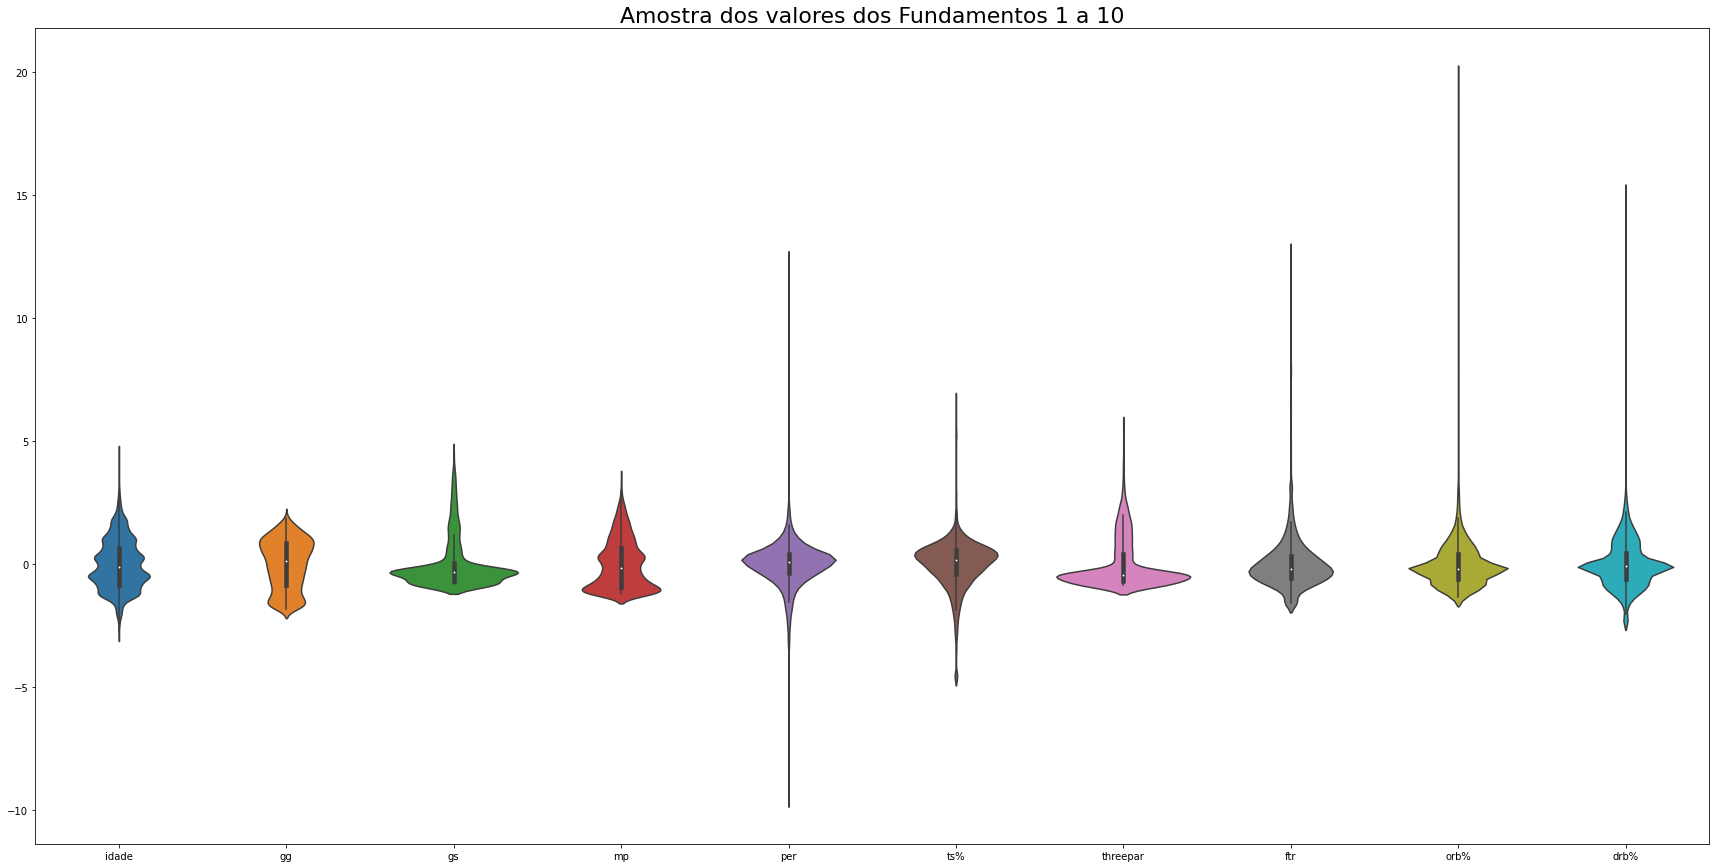

In [ ]:
plotando_violinos(x_v1, 0, 10)

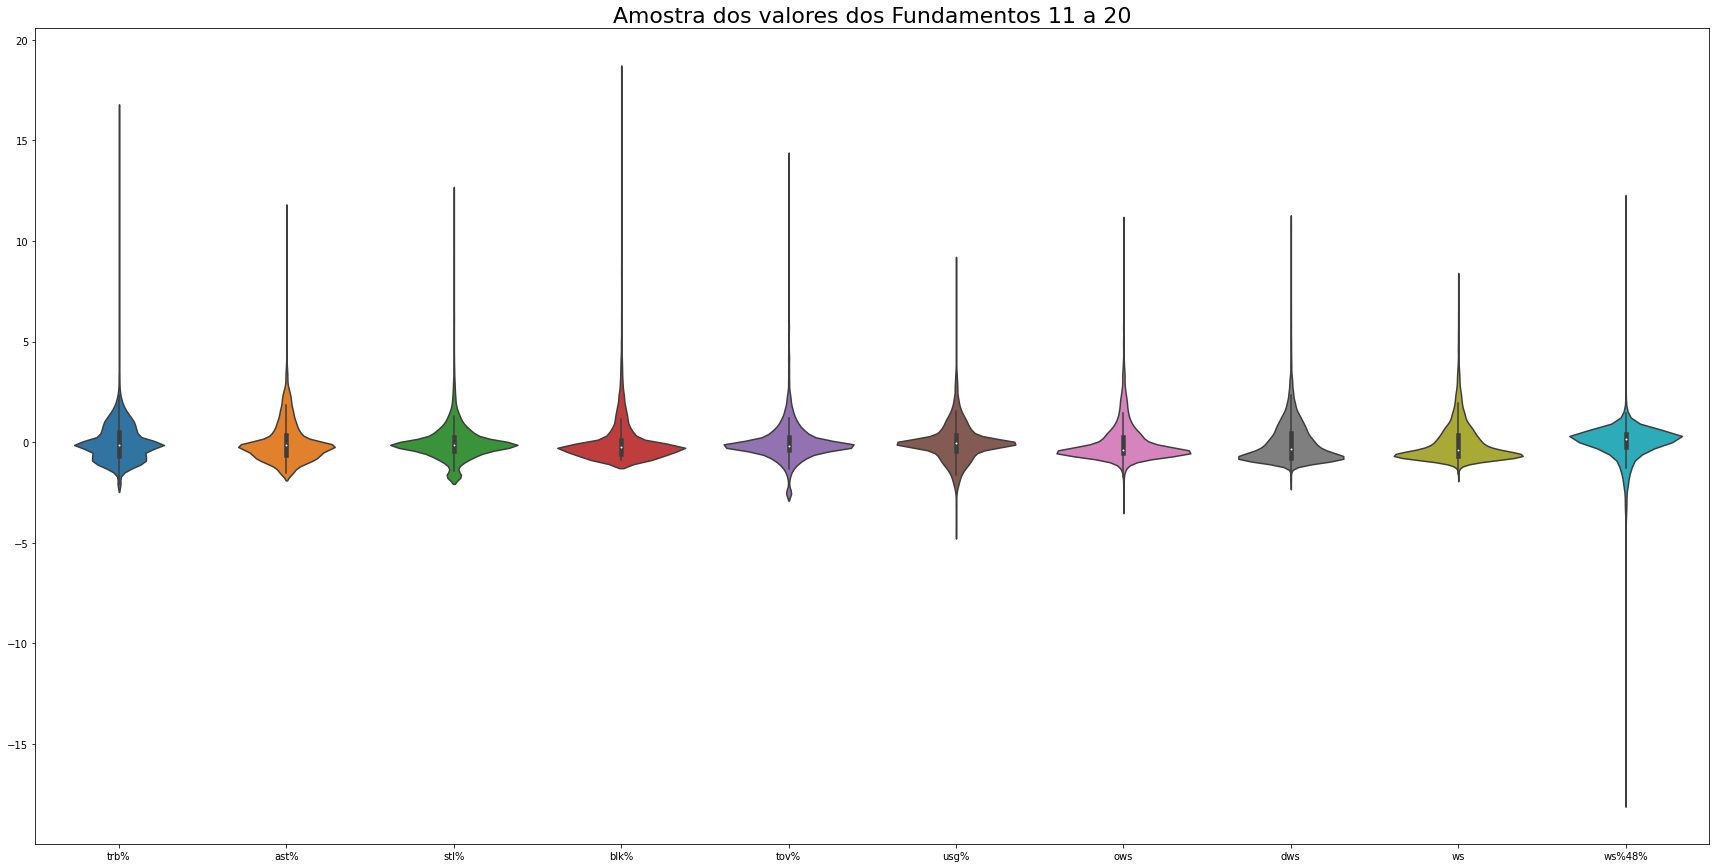

In [ ]:
plotando_violinos(x_v1, 10, 20)

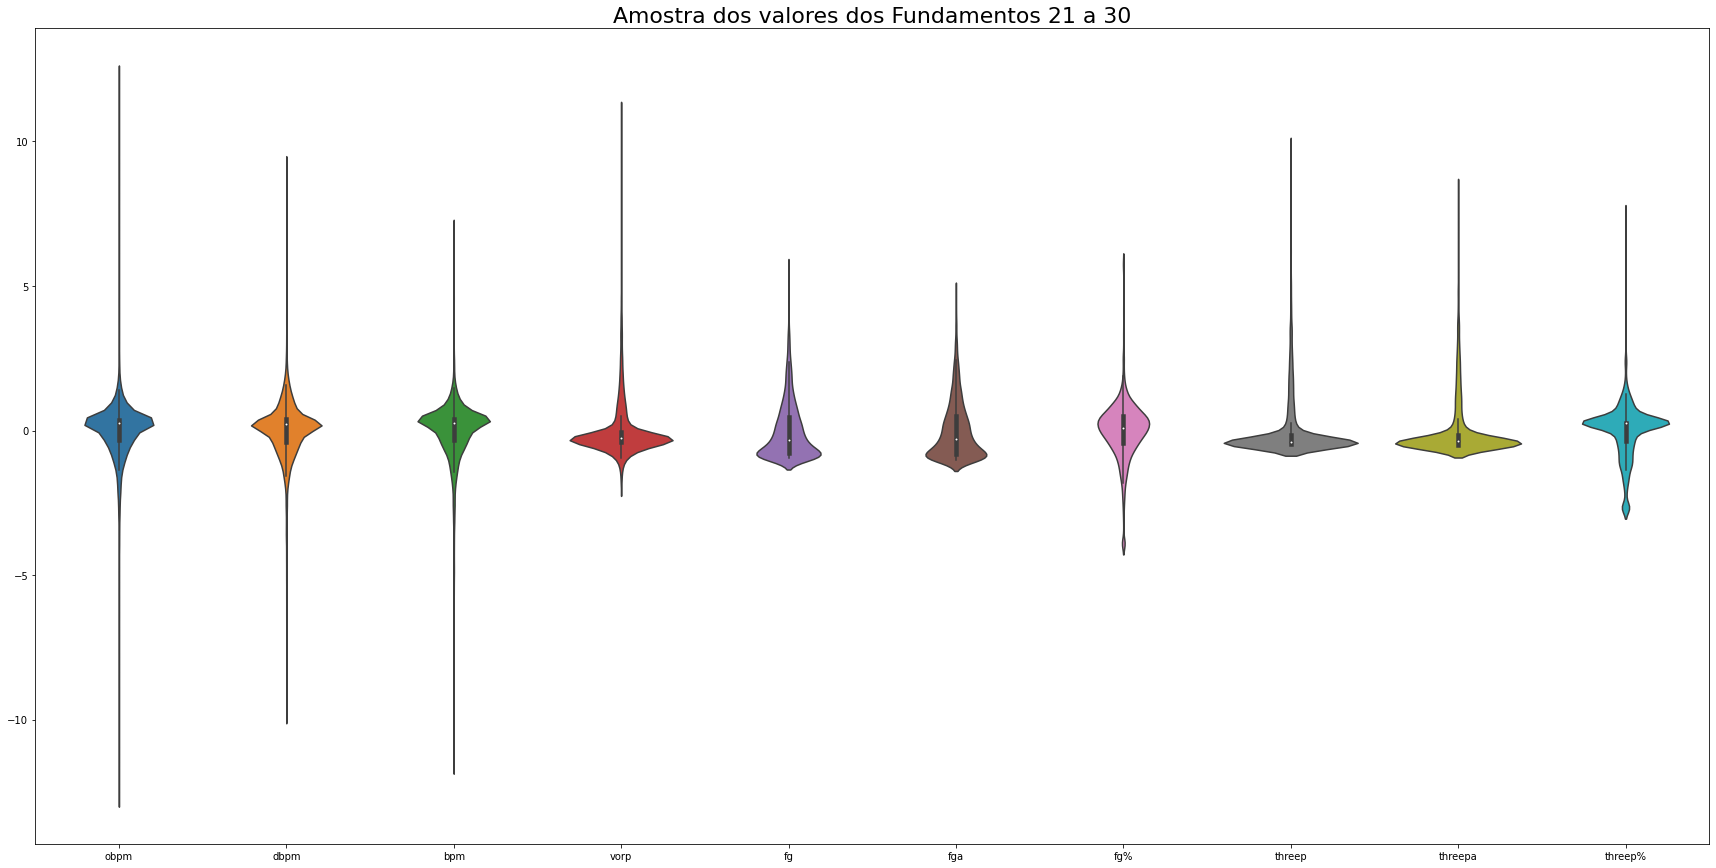

In [ ]:
plotando_violinos(x_v1, 20, 30)

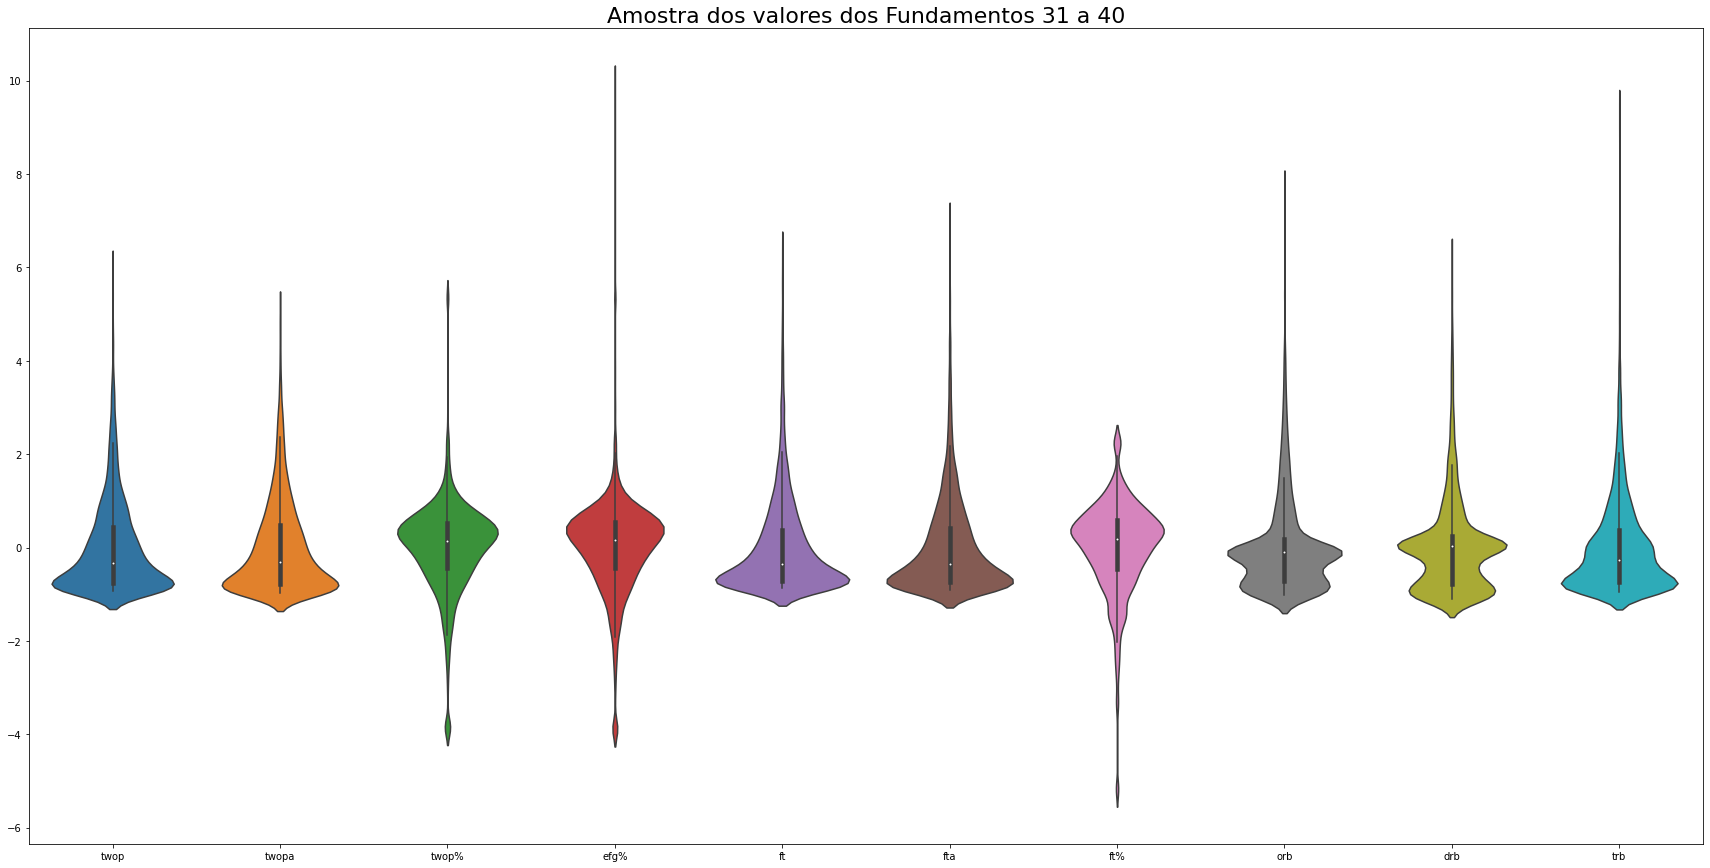

In [ ]:
plotando_violinos(x_v1, 30, 40)

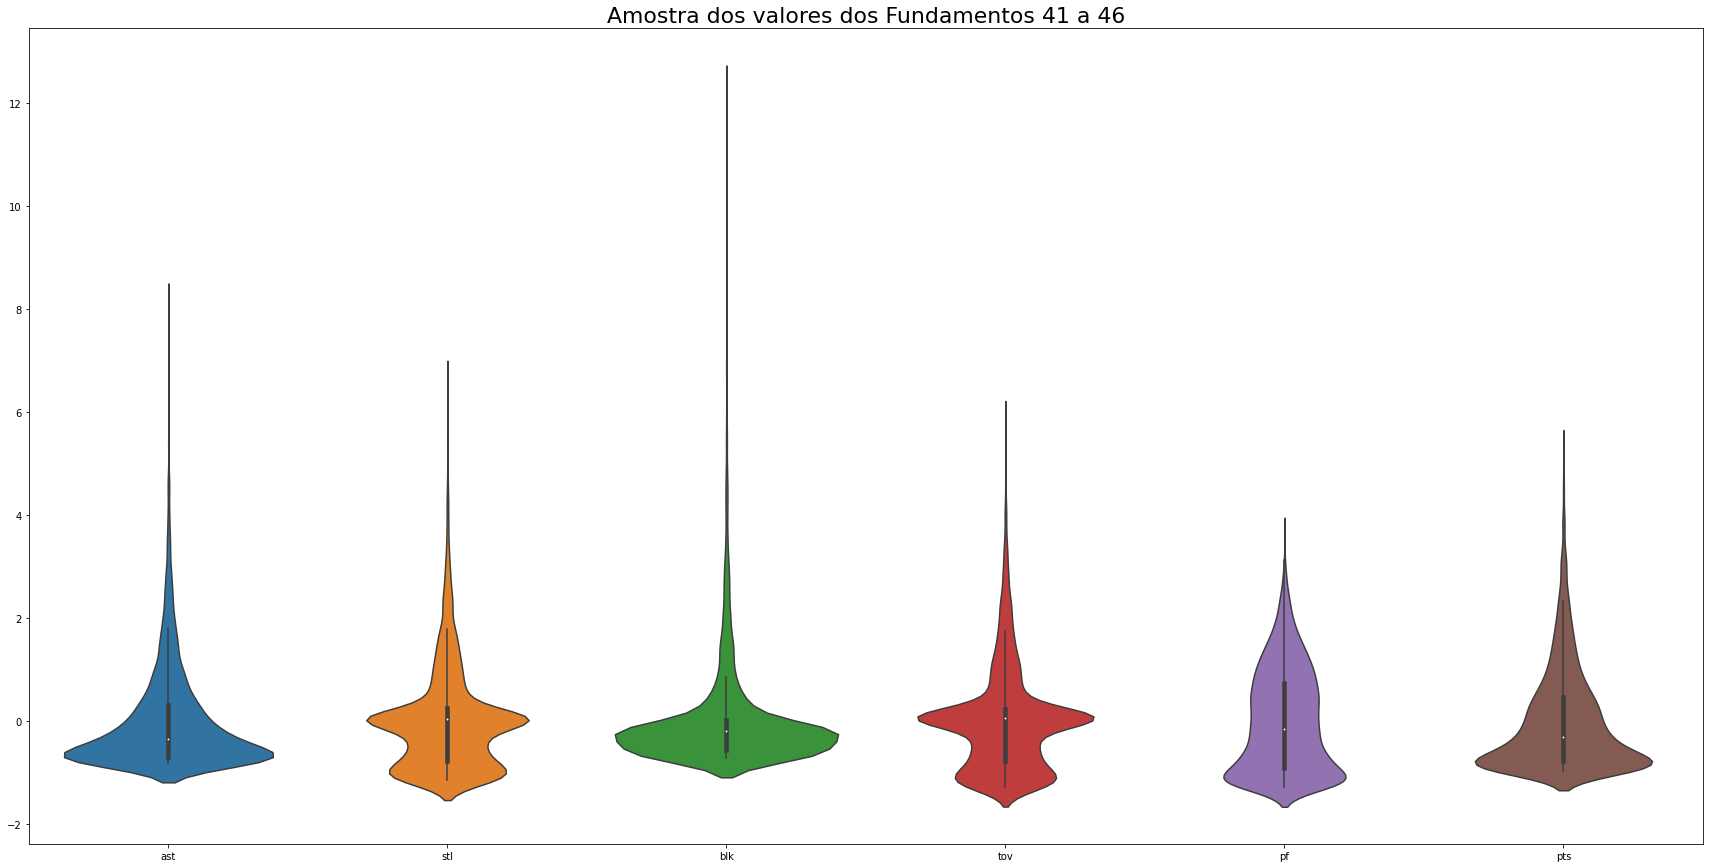

In [ ]:
plotando_violinos(x_v1, 40, x_v1.shape[1])

#### Resultado

Podemos observar que há colunas desnecessárias para analise futura como **BLANL** e **BLANK2** (já retirei no inicio)

## Renomeando colunas

DataFrame mais atual nessa seção: **df_status_sesonais_v2**

## Vericando através da matriz de correlação

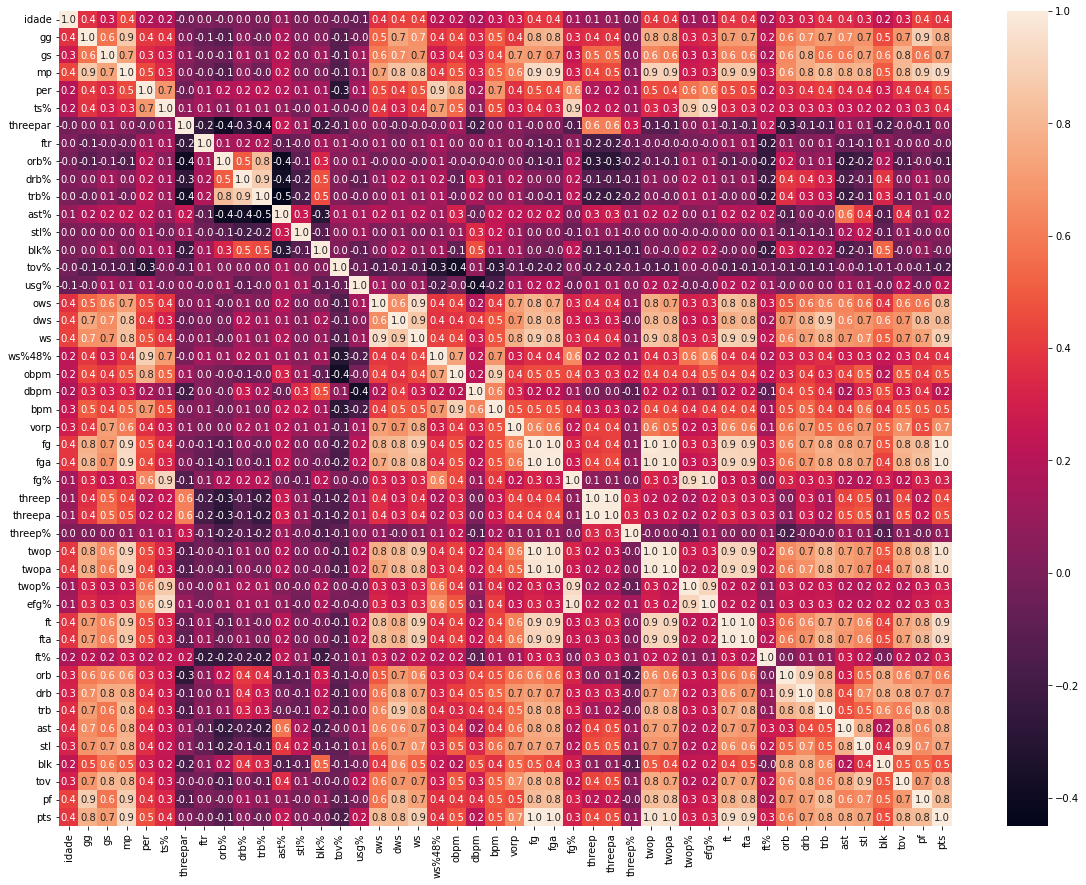

In [ ]:
matriz_correlacao = x_v1.corr()
plt.figure(figsize=(20,15))
sns.heatmap(matriz_correlacao, annot=True, fmt = ".1f")

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacao = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacao

fg         1.994832
threep     1.994817
threepa    1.994817
ft         1.990190
fta        1.990190
pts        1.994832
dtype: float64

# Clusterização dos dados originais

### Preparacao do dataset para treino

In [ ]:
#df_ori = df_status_sesonais_v2.copy()
#ano_season = 2013
#df_ori_raw = df_status_sesonais_v2[df_status_sesonais_v2['ano'] == ano_season].copy()
df_ori_raw = x_v1.copy()
x_ori = df_ori_raw.copy()
#df_ori.info()
x_ori.head()

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws%48%,obpm,dbpm,bpm,vorp,fg,fga,fg%,threep,threepa,threep%,twop,twopa,twop%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1.793200,1.588100,2.455982,1.931628,0.485111,0.787747,-0.524981,0.502516,0.880143,0.980386,1.049416,-0.839264,-0.184568,-0.285066,-0.618754,-1.034422,1.973453,1.860708,2.113789,0.740121,0.615306,0.680604,0.787664,1.483135,1.049224,0.876251,0.804558,-0.190651,-0.104369,-1.185809,1.143599,0.960316,0.764359,0.663613,1.462715,1.549656,0.077105,3.824118,2.878667,2.561724,0.067997,1.366686,0.753540,0.768683,0.888704,1.117377
1,-0.850937,-1.484986,-0.818768,-1.119121,-1.790210,-2.676670,-0.841282,-1.571118,3.281340,0.926420,2.215529,-1.515030,-0.851952,-0.907312,-0.451567,-0.404436,-0.611536,-0.803541,-0.801273,-1.384146,-2.269018,-2.717044,-3.046800,-0.521245,-0.934434,-0.942219,-2.068125,-0.487180,-0.549785,0.278204,-0.904016,-0.899331,-2.102831,-2.129870,-0.863721,-0.902993,0.336037,-0.731217,-0.999846,-0.806940,-0.807337,-1.110756,-0.710029,-1.204758,-1.084300,-0.937807
2,-0.473203,1.583050,-0.232570,1.041471,0.114895,0.164980,-0.537892,-0.427826,-0.285075,-1.198476,-0.900850,0.538175,-0.747492,-0.577888,-0.542509,1.138705,-0.611536,-0.113520,-0.436214,-0.153293,0.111872,-0.973293,-0.363057,-1.877592,1.375900,1.477198,0.305940,-0.295029,-0.037863,-1.290021,1.509676,1.594359,0.291941,0.159895,0.806412,0.749939,0.565741,0.684191,-0.150870,0.037216,0.908771,0.019506,-0.147519,1.201645,0.890385,1.212227
3,-0.850937,-0.636541,-0.514813,-0.606348,-1.030293,-1.363632,1.553563,-1.246948,-1.035155,-1.623455,-1.546972,1.524836,0.889050,-0.541285,-0.131890,0.452865,-0.394445,-0.956879,-0.655249,-1.488479,-0.989590,-2.026283,-1.716397,-0.702091,-0.544953,-0.500300,-1.434398,0.551857,0.463557,-0.094943,-0.686784,-0.666003,-1.514480,-1.018005,-0.704660,-0.754080,0.736167,-0.845100,-0.897604,-0.777867,-0.281779,-0.877853,-0.522526,-0.773153,-0.988466,-0.534616
4,-0.473203,-0.848652,-0.818768,-0.971511,-0.387287,0.086589,0.695034,0.687003,-0.178932,1.342726,0.651985,-1.022779,-1.374253,4.363472,0.193298,-0.287532,-0.611536,-0.688538,-0.703924,-0.301334,-1.403240,1.427524,-0.477747,-0.385610,-0.835799,-0.868371,0.006769,-0.273679,-0.392271,2.375895,-0.839651,-0.857484,-0.402129,0.394861,-0.747650,-0.704442,-1.835040,-0.828831,-0.802665,-0.719721,-0.764434,-1.110756,-0.100643,-1.033744,-0.963247,-0.822058


In [ ]:
#coluna_jogadores = df_ori['jogador']

In [ ]:
#df_ori['pos'] = df_ori['pos'].astype('category')

In [ ]:
#Transforma coluna categorica em código numericos
#colnum_pos = pd.DataFrame(df_ori['pos'].cat.codes, columns={'posicao'})

#Anexa coluna categorica no dataframe
#df_ori_v2 = pd.concat([df_ori, colnum_pos], axis='columns')

#Cria o dataframe de classes
#x_ori = df_ori_v2.drop(columns=['id', 'ano', 'jogador', 'pos', 'tm'])
#x_ori = df_ori_v2.drop(columns=['id', 'ano', 'pos', 'tm']).copy()
#x_ori.info()

In [ ]:
#x_ori = x_ori.groupby(level=0).mean()
x_ori.head()

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ows,dws,ws,ws%48%,obpm,dbpm,bpm,vorp,fg,fga,fg%,threep,threepa,threep%,twop,twopa,twop%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1.793200,1.588100,2.455982,1.931628,0.485111,0.787747,-0.524981,0.502516,0.880143,0.980386,1.049416,-0.839264,-0.184568,-0.285066,-0.618754,-1.034422,1.973453,1.860708,2.113789,0.740121,0.615306,0.680604,0.787664,1.483135,1.049224,0.876251,0.804558,-0.190651,-0.104369,-1.185809,1.143599,0.960316,0.764359,0.663613,1.462715,1.549656,0.077105,3.824118,2.878667,2.561724,0.067997,1.366686,0.753540,0.768683,0.888704,1.117377
1,-0.850937,-1.484986,-0.818768,-1.119121,-1.790210,-2.676670,-0.841282,-1.571118,3.281340,0.926420,2.215529,-1.515030,-0.851952,-0.907312,-0.451567,-0.404436,-0.611536,-0.803541,-0.801273,-1.384146,-2.269018,-2.717044,-3.046800,-0.521245,-0.934434,-0.942219,-2.068125,-0.487180,-0.549785,0.278204,-0.904016,-0.899331,-2.102831,-2.129870,-0.863721,-0.902993,0.336037,-0.731217,-0.999846,-0.806940,-0.807337,-1.110756,-0.710029,-1.204758,-1.084300,-0.937807
2,-0.473203,1.583050,-0.232570,1.041471,0.114895,0.164980,-0.537892,-0.427826,-0.285075,-1.198476,-0.900850,0.538175,-0.747492,-0.577888,-0.542509,1.138705,-0.611536,-0.113520,-0.436214,-0.153293,0.111872,-0.973293,-0.363057,-1.877592,1.375900,1.477198,0.305940,-0.295029,-0.037863,-1.290021,1.509676,1.594359,0.291941,0.159895,0.806412,0.749939,0.565741,0.684191,-0.150870,0.037216,0.908771,0.019506,-0.147519,1.201645,0.890385,1.212227
3,-0.850937,-0.636541,-0.514813,-0.606348,-1.030293,-1.363632,1.553563,-1.246948,-1.035155,-1.623455,-1.546972,1.524836,0.889050,-0.541285,-0.131890,0.452865,-0.394445,-0.956879,-0.655249,-1.488479,-0.989590,-2.026283,-1.716397,-0.702091,-0.544953,-0.500300,-1.434398,0.551857,0.463557,-0.094943,-0.686784,-0.666003,-1.514480,-1.018005,-0.704660,-0.754080,0.736167,-0.845100,-0.897604,-0.777867,-0.281779,-0.877853,-0.522526,-0.773153,-0.988466,-0.534616
4,-0.473203,-0.848652,-0.818768,-0.971511,-0.387287,0.086589,0.695034,0.687003,-0.178932,1.342726,0.651985,-1.022779,-1.374253,4.363472,0.193298,-0.287532,-0.611536,-0.688538,-0.703924,-0.301334,-1.403240,1.427524,-0.477747,-0.385610,-0.835799,-0.868371,0.006769,-0.273679,-0.392271,2.375895,-0.839651,-0.857484,-0.402129,0.394861,-0.747650,-0.704442,-1.835040,-0.828831,-0.802665,-0.719721,-0.764434,-1.110756,-0.100643,-1.033744,-0.963247,-0.822058


In [ ]:
'''
# Normalização dos dados
scaler = StandardScaler()
scaler.fit(x_ori)
x_ori_v2 = scaler.transform(x_ori)
x_ori_v2 = pd.DataFrame(x_ori_v2, columns=x_ori.keys())
x_ori_v2.head(1)
'''

'\n# Normalização dos dados\nscaler = StandardScaler()\nscaler.fit(x_ori)\nx_ori_v2 = scaler.transform(x_ori)\nx_ori_v2 = pd.DataFrame(x_ori_v2, columns=x_ori.keys())\nx_ori_v2.head(1)\n'

In [ ]:
import numpy as np

In [ ]:
#Finalizacao do preparo
quantidade_colunas = range(x_ori.shape[1])
x_ori_v3 = x_ori.iloc[:, quantidade_colunas].values
x_ori_v3

array([[ 1.79319993,  1.58809989,  2.45598231, ...,  0.76868252,
         0.88870414,  1.11737718],
       [-0.85093666, -1.48498565, -0.81876803, ..., -1.20475784,
        -1.08430039, -0.93780727],
       [-0.47320286,  1.58304962, -0.23256963, ...,  1.20164502,
         0.89038543,  1.2122269 ],
       ...,
       [-0.09546906, -1.36377932, -0.77534593, ..., -1.19661434,
        -1.22048562, -0.90694092],
       [-1.22867046,  0.39371249, -0.60165751, ..., -0.30082986,
        -0.08560871, -0.41983134],
       [ 1.41546613,  1.09880702,  2.80864773, ...,  1.55776633,
         1.95018587,  1.48223327]])

## K-Means

### Clusterizacao dos dados originais

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Teste para ver se ta funcionando
kmeans_dados = KMeans(n_clusters=5, random_state=42)
rotulos_kmeans = kmeans_dados.fit_predict(x_ori_v3)
rotulos_kmeans[0:5]

array([4, 3, 2, 3, 1], dtype=int32)

### Elbow method

In [ ]:
#Elbow method
#Inertia: soma das distâncias quadradas das amostras até o centro do cluster mais próximo

wcss = []
for i in range(1,11):
  kmeans_dados_e = KMeans(n_clusters=i, random_state=42)
  kmeans_dados_e.fit(x_ori_v3)
  wcss.append(kmeans_dados_e.inertia_)

In [ ]:
wcss

[180365.99999999983,
 131277.6835121119,
 117449.04981644444,
 109262.84575463305,
 102878.31895873004,
 97570.23191945402,
 93301.05800045413,
 89956.7711458518,
 87060.44125529585,
 84397.78383836149]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

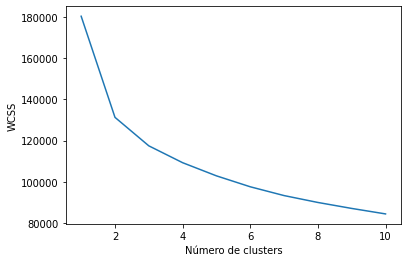

In [ ]:
plt.plot(range(1, 11), wcss) 
plt.xlabel('Número de clusters') 
plt.ylabel('WCSS') 
plt.show()

### Elbo Method com bibilioteca Yellow Brick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
kmeans_dados_elbow = KMeans(random_state=42)

#### TESTAR COM MAIS CLUSTER

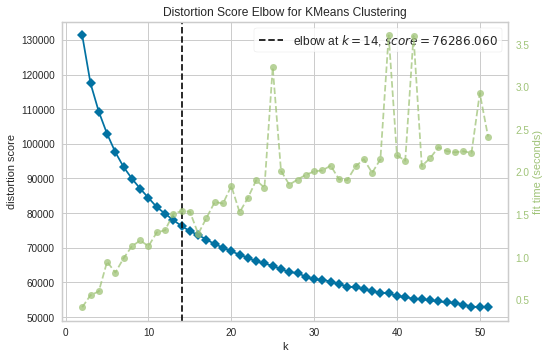

In [ ]:
#distorção: média das distâncias quadradas dos centros dos clusters dos respectivos clusters

grafico = KElbowVisualizer(kmeans_dados_elbow, k=(2,52))

grafico.fit(x_ori_v3)        
grafico.show()        

### Clusterizacao dos dados originais (KMEANS)

In [ ]:
#rodar novamente 
kmeans_dados_final = KMeans(n_clusters =14, random_state=42)
rotulos_kmeans_final = kmeans_dados_final.fit_predict(x_ori_v3)

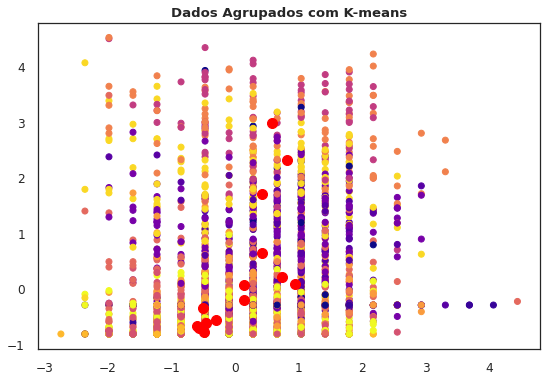

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=x_ori_v3[:,0], y=x_ori_v3[:, 2], c=rotulos_kmeans_final, cmap='plasma')

#plot dos centroides
plt.scatter(kmeans_dados_final.cluster_centers_[:, 0], 
            kmeans_dados_final.cluster_centers_[:, 2], 
            s=100,                             
            c='red') 

plt.title('Dados Agrupados com K-means',fontweight='bold')
plt.show()

### Transformando em arquivo

In [ ]:
# rotulos_meanshift_pca,coluna_jogadores,df_status_sesonais_v2

df_kmeans = df_ori_raw.copy()
df_kmeans['rotulos'] = rotulos_kmeans
#df_kmeans.to_csv(f'kmeans_{ano_season}.csv', sep=',')
df_kmeans.to_csv(f'kmeans_agrupado.csv', sep=',')

## Mean Shift

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
bw = estimate_bandwidth(x_ori_v3)

In [ ]:
meanshift_dados = MeanShift(bandwidth=bw).fit(x_ori_v3)

In [ ]:

rotulos_meanshift = meanshift_dados.labels_
numero_rotulos = len(np.unique(rotulos_meanshift))
numero_rotulos


57

In [ ]:

cluster_centers = meanshift_dados.cluster_centers_
cluster_centers


array([[-0.09546906, -0.08626165, -0.26542638, ..., -0.22210093,
        -0.16527084, -0.28067599],
       [-0.47320286,  1.60312442,  3.53321234, ...,  4.46433639,
         1.47106412,  3.97211263],
       [-0.72502539, -1.77285069, -0.81876803, ..., -1.2699058 ,
        -1.27092459, -0.96095703],
       ...,
       [-1.98413805, -1.71224752, -0.81876803, ..., -1.25361881,
        -1.23561731, -0.92333867],
       [-1.98413805, -1.71224752, -0.81876803, ..., -1.22918832,
        -1.250749  , -0.95516959],
       [-2.36187185, -1.5758904 , -0.81876803, ..., -1.27804929,
        -1.26588069, -0.96095703]])

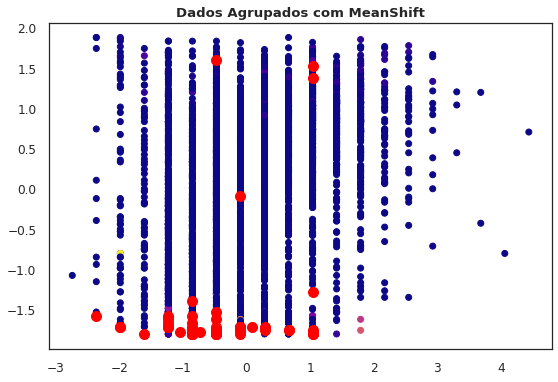

In [ ]:

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=x_ori_v3[:,0], y=x_ori_v3[:, 1], c=rotulos_meanshift, cmap='plasma')

#plot dos centroides
plt.scatter(meanshift_dados.cluster_centers_[:, 0], 
            meanshift_dados.cluster_centers_[:, 1], 
            s=100,                             
            c='red') 

plt.title('Dados Agrupados com MeanShift',fontweight='bold')
plt.show()


### Transformando em arquivo

In [ ]:
# rotulos_meanshift_pca,coluna_jogadores,df_status_sesonais_v2

df_mean_shift = df_ori_raw.copy()
df_mean_shift['rotulos'] = rotulos_meanshift
#df_mean_shift.to_csv(f'mean_shift_{ano_season}.csv', sep=',')
df_kmeans.to_csv(f'mean_shift_agrupado.csv', sep=',')

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
#realizar varios testes com os parametros `eps` e `min_samples`
dbscan = DBSCAN(eps=0.3, min_samples=5)

In [ ]:
dbscan_dados = dbscan.fit(x_ori_v3)

In [ ]:
rotulos_dbscan = dbscan_dados.labels_
#rotulos_dbscan

In [ ]:
np.unique(rotulos_dbscan, return_counts=True)
# -1 = Ruído

(array([-1]), array([3921]))

In [ ]:
numero_rotulos = len(np.unique(rotulos_dbscan))
numero_rotulos

1

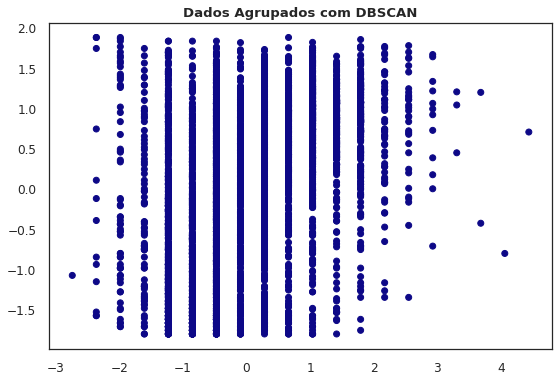

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=x_ori_v3[:,0], y=x_ori_v3[:, 1], c=rotulos_dbscan, cmap='plasma')

plt.title('Dados Agrupados com DBSCAN',fontweight='bold')
plt.show()
#analisar clusters criados

### Transformando em arquivo

In [ ]:
# rotulos_meanshift_pca,coluna_jogadores,df_status_sesonais_v2

df_dbscan = df_ori_raw.copy()
df_dbscan['rotulos'] = rotulos_dbscan
#df_dbscan.to_csv(f'dbscan_{ano_season}.csv', sep=',')
df_dbscan.to_csv(f'dbscan_agrupado.csv', sep=',')

# Clusterização dos dados com redução de dimensionalidade

## Número de componentes

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#testar diferentes valores para o `n_components` -> por padrão irá testar todos os componentes se não especificar
pca = PCA()

In [ ]:
pca_dados = pca.fit_transform(x_ori_v3)

In [ ]:
#para sumprimir o uso de notações científicas
np.set_printoptions(precision = 2, suppress = True)

In [ ]:
pca.explained_variance_
# Foram criados 47 componentes
#Os 9 primeiros componentes explicam mais de uma variável do conjunto de dados, o que é quantidade ideal para se testar
#O primeiro componente, por exemplo, explica 20.74 variaveis dos dados

array([18.86,  5.16,  4.16,  2.19,  2.01,  1.61,  1.45,  1.14,  1.01,
        0.95,  0.9 ,  0.79,  0.74,  0.7 ,  0.67,  0.57,  0.45,  0.39,
        0.29,  0.27,  0.25,  0.2 ,  0.18,  0.16,  0.13,  0.12,  0.11,
        0.09,  0.08,  0.07,  0.07,  0.06,  0.04,  0.04,  0.03,  0.03,
        0.01,  0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ])

In [ ]:
len(pca.explained_variance_)

46

In [ ]:
#percentual da variancia explicada
variancia_explicada = np.around(pca.explained_variance_ratio_, 2)*100
variancia_explicada

array([41., 11.,  9.,  5.,  4.,  4.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

## Usando os componentes pegos da sessão anteiror

In [ ]:
#utilizando 9 componentes que melhor explicam os dados
pca_2 = PCA(n_components=5)
pca_dados_2 = pca_2.fit_transform(x_ori_v3)

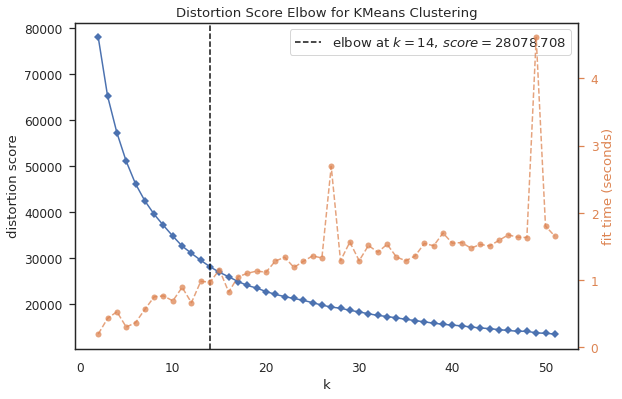

In [ ]:
#Elbow method
kmeans_dadospca_elbow = KMeans(random_state=42)

grafico = KElbowVisualizer(kmeans_dadospca_elbow, k=(2,52))
grafico.fit(pca_dados_2)        
grafico.show() 

## Testando modelos com dimensão reduzida:

### KMEANS

In [ ]:
#K-means
kmeans_dados_pca = KMeans(n_clusters=14, random_state=42)
rotulos_kmeans_pca = kmeans_dados_pca.fit_predict(pca_dados_2)

In [ ]:
kmeans_dados_pca.cluster_centers_[:, 0]

array([ 2.03, -3.94,  8.75,  1.53,  7.01, -2.9 , -5.27,  3.45, -0.18,
        6.9 , -2.67, 14.19, -8.53, -1.48])

In [ ]:
kmeans_dados_pca.cluster_centers_[:, 2]

array([-0.54, -2.01, -1.28,  1.78, -1.72,  1.24, -1.64, -0.54, -0.19,
        1.27,  0.71, -2.24, -8.12,  8.23])

In [ ]:
#OLHAR CLUSTER NUMERO 6 (-8.47, 8.11)

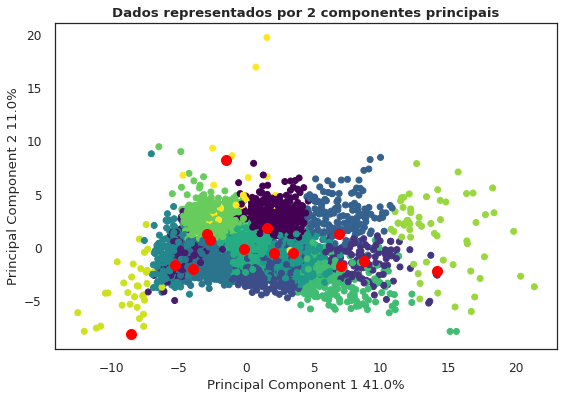

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)}, font_scale=1.1)

plt.scatter(x=pca_dados_2[:, 0], y=pca_dados_2[:, 1], c=rotulos_kmeans_pca, cmap='viridis')

#plot dos centroides
plt.scatter(kmeans_dados_pca.cluster_centers_[:, 0], 
            kmeans_dados_pca.cluster_centers_[:, 2], 
            s=100,                             
            c='red') 

plt.xlabel(f'Principal Component 1 {variancia_explicada[0]}%')
plt.ylabel(f'Principal Component 2 {variancia_explicada[1]}%')
plt.title('Dados representados por 2 componentes principais', fontweight='bold')
plt.show()

#### Transformando para arquivo

In [ ]:
# rotulos_meanshift_pca,coluna_jogadores,df_status_sesonais_v2

df_kmeans_reduzido = x.copy()
df_kmeans_reduzido = df_kmeans_reduzido.reset_index()
df_kmeans_reduzido['rotulos'] = rotulos_kmeans_pca
#df_kmeans_reduzido.to_csv(f'kmeans_reduzido_{ano_season}.csv', sep=',')
df_kmeans_reduzido.to_csv(f'kmeans_reduzido_agrupado.csv', sep=',')

### Mean Shift

In [ ]:
bw_pca = estimate_bandwidth(pca_dados_2)

In [ ]:
meanshift_dados_pca = MeanShift(bandwidth=bw_pca).fit(pca_dados_2)

In [ ]:

rotulos_meanshift_pca = meanshift_dados_pca.labels_
numero_rotulos_pca = len(np.unique(rotulos_meanshift_pca))
numero_rotulos


1

In [ ]:

cluster_centers_pca = meanshift_dados_pca.cluster_centers_
cluster_centers_pca


array([[ -1.69,   0.1 ,   0.25,  -0.01,  -0.25],
       [ -9.98,  -4.43, -10.41,  -3.06,   7.35],
       [  2.2 ,   4.37,  18.04,  -5.64,  -1.11],
       [ -6.77,   9.11,  -4.52,  -2.73,   9.95],
       [  3.25,  -0.29,  23.35,  -4.19,  -2.05],
       [  1.54,  19.69,  14.2 ,  -4.25,  10.03],
       [  0.72,  16.91,  11.05,  -0.79,   7.09],
       [  0.55,   7.88,   5.79,   8.2 ,  -5.7 ],
       [ -4.7 ,   6.76,   1.9 ,  -7.36,  12.43]])

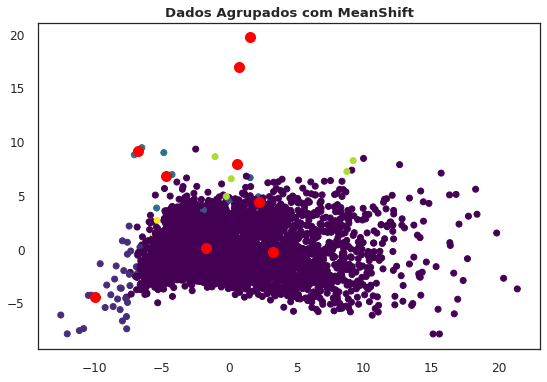

In [ ]:

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=pca_dados_2[:,0], y=pca_dados_2[:, 1], c=rotulos_meanshift_pca, cmap='viridis')

#plot dos centroides
plt.scatter(meanshift_dados_pca.cluster_centers_[:, 0], 
            meanshift_dados_pca.cluster_centers_[:, 1], 
            s=100,                             
            c='red') 

plt.title('Dados Agrupados com MeanShift',fontweight='bold')
plt.show()


#### Transformação para arquivo

In [ ]:
# rotulos_meanshift_pca,coluna_jogadores,df_status_sesonais_v2

df_mean_shift_reduzido = df_ori_raw.copy()
df_mean_shift_reduzido['rotulos'] = rotulos_meanshift_pca
#df_mean_shift_reduzido.to_csv(f'mean_shift_reduzido_{ano_season}.csv', sep=',')
df_mean_shift_reduzido.to_csv(f'mean_shift_reduzido_agrupado.csv', sep=',')

### DBSCAN

In [ ]:
#realizar varios testes com os parametros `eps` e `min_samples`
dbscan_pca = DBSCAN(eps=5, min_samples=5)

In [ ]:
dbscan_dados_pca = dbscan_pca.fit(pca_dados_2)

In [ ]:
rotulos_dbscan_pca = dbscan_dados_pca.labels_
#rotulos_dbscan

In [ ]:
np.unique(rotulos_dbscan_pca, return_counts=True)
# -1 = Ruído

(array([-1,  0,  1]), array([  11, 3904,    6]))

In [ ]:
numero_rotulos_pca = len(np.unique(rotulos_dbscan_pca))
numero_rotulos_pca

3

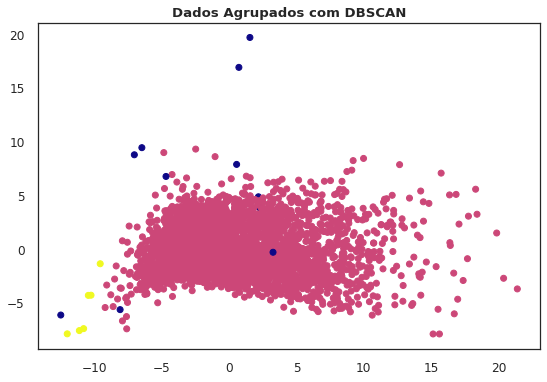

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=pca_dados_2[:,0], y=pca_dados_2[:, 1], c=rotulos_dbscan_pca, cmap='plasma')

plt.title('Dados Agrupados com DBSCAN',fontweight='bold')
plt.show()
#analisar clusters criados

#### Transformação para arquivo

In [ ]:
# rotulos_meanshift_pca,coluna_jogadores,df_status_sesonais_v2

df_dbscan_reduzido = df_ori_raw.copy()
df_dbscan_reduzido['rotulos'] = rotulos_dbscan_pca
#df_dbscan_reduzido.to_csv(f'dbscan_shift_reduzido_{ano_season}.csv', sep=',')
df_dbscan_reduzido.to_csv(f'dbscan_shift_reduzido_agrupado.csv', sep=',')

# Parte 2: Machine Learning Supervisionado

## Rotulação dos jogadores

In [ ]:
print(df_dbscan_reduzido['rotulos'].unique()) # [-1  0  1  2  3  4  5]
print(df_mean_shift_reduzido['rotulos'].unique()) # [0 1 2 3 4]
print(df_kmeans_reduzido['rotulos'].unique()) # [0 1 2 3 4 5 6 7]

[ 0  1 -1]
[0 1 7 3 2 6 8 5 4]
[ 4  6  7 10  5  1  3  0  2  8  9 11 13 12]


## Tratamento do dataframe KMEANS

In [ ]:
df_kmeans_reduzido.drop(["jogador"], axis=1, inplace=True)

In [ ]:
df_kmeans_reduzido.head()

In [ ]:
'''
scaler = StandardScaler()
scaler.fit(df_kmeans_reduzido)
df_kmeans_reduzido_v1 = scaler.transform(df_kmeans_reduzido)
df_kmeans_reduzido_v1 = pd.DataFrame(df_kmeans_reduzido_v1, columns=df_kmeans_reduzido.keys())
df_kmeans_reduzido_v1.head(1)
'''

In [ ]:
df_kmeans_reduzido['classe'] =0
df_kmeans_reduzido.head()

In [ ]:
classe_positivo = df_kmeans_reduzido[(df_kmeans_reduzido['rotulos'] == 5) | (df_kmeans_reduzido['rotulos'] == 7) | (df_kmeans_reduzido['rotulos'] == 3) | (df_kmeans_reduzido['rotulos'] == 1)].copy()
classe_positivo
classe_positivo.loc[:, 'classe'] = 1 
classe_positivo.shape

In [ ]:
classe_negativa = df_kmeans_reduzido[(df_kmeans_reduzido['rotulos'] == 0) | (df_kmeans_reduzido['rotulos'] == 2) | (df_kmeans_reduzido['rotulos'] == 4)| (df_kmeans_reduzido['rotulos'] == 6) ].copy()
classe_negativa.shape

In [ ]:
df_kmeans_reduzido_v2 = pd.concat([classe_positivo, classe_negativa])
df_kmeans_reduzido_v2.head()

## Separando as classe das features

In [ ]:
y_kmeans = df_kmeans_reduzido_v2['classe']
x_kmeans = df_kmeans_reduzido_v2.drop(columns=['classe'])
x_kmeans.reset_index(drop=True, inplace=True)
y_kmeans.reset_index(drop=True, inplace=True)
print(y_kmeans.shape)
print(x_kmeans.shape)

## Escalonando Features

In [ ]:
scaler = StandardScaler()
scaler.fit(x_kmeans)
x_kmeans_v1 = scaler.transform(x_kmeans)
x_kmeans_v1 = pd.DataFrame(x_kmeans_v1, columns=x_kmeans.keys())

## Vericação da Baseline e Acuracia com classificador mais simples possível

In [ ]:
registros = []
index = []

In [ ]:
#TESTEEEE! DESCONSIDERAR, NÃO UTILIZAR
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 150993
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_kmeans_v1, y_kmeans, test_size = 0.3, stratify = y_kmeans)

modelo = RandomForestClassifier(n_estimators=100)

modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)


acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acuracia do modelo é {acuracia:.2f}%')
registros.append(acuracia)
index.append('ac_initial')

In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 150993
np.random.seed(SEED)

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia_dum = dummy.score(teste_x, teste_y)*100
print(f'A Baseline do modelo é {acuracia_dum:.2f}%')
registros.append(acuracia_dum)
index.append('ac_base_line')

## Redução da dimensionalidade

In [ ]:
dados = pd.concat([y_kmeans, x_kmeans_v1], axis=1)
dados.head()

In [ ]:
matriz_correlacao = dados.corr()
plt.figure(figsize=(30,25))
sns.heatmap(matriz_correlacao, annot=True, fmt = ".1f")

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacao = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacao

In [ ]:
x_kmeans_v2 = x_kmeans_v1.copy()
x_kmeans_v2.drop(columns=['fg', 'threep', 'threepa', 'ft', 'fta','pts'])
dados = pd.concat([y_kmeans, x_kmeans_v2], axis='columns')
dados.head()

In [ ]:
print(dados[dados['classe'] == 1].count().unique())
print(dados[dados['classe'] == 0].count().unique())

In [ ]:
def treino_teste(dados_tratados, nome_de_registro):
    SEED = 150993
    np.random.seed(SEED)

    x = dados_tratados.drop(columns=['classe'])
    y = dados_tratados['classe']

    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3, stratify = y)

    modelo = RandomForestClassifier(n_estimators=100)
    modelo.fit(treino_x, treino_y)
    previsoes = modelo.predict(teste_x)
    acuracia = accuracy_score(teste_y, previsoes)*100
    registros.append(acuracia)
    index.append(nome_de_registro)
    print(f'A acuracia do modelo é {acuracia:.2f}%')
    

treino_teste(dados, 'ac_reducao_dim01')

#### Resultado

In [ ]:
pd.DataFrame(registros, index=index, columns=['resultado_acuracia_modelos'])


### Criando função treino teste Reduzido

In [ ]:
registros_acuracia = []
registros_recall = []
registros_auc = []
registros_f1_micro = []
registros_f1_macro = []
registros_precision = []
index = []
registros_baseline = []

In [ ]:
def treino_teste_reducao(x, y, modelo_estimado, nome_modelo):
    import numpy as np
    from sklearn.feature_selection import RFECV
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_score

    SEED = 5
    np.random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)

    modelo = modelo_estimado
    
    features_rfecv = RFECV(estimator = modelo, cv = 5, step =1, scoring='accuracy')
    features_rfecv.fit(treino_x, treino_y)
    treino_rfecv = features_rfecv.transform(treino_x)
    teste_rfecv = features_rfecv.transform(teste_x)

    modelo.fit(treino_rfecv, treino_y)
    previsoes = modelo.predict(teste_rfecv)

    taxa_de_acuracia = accuracy_score(teste_y, previsoes) * 100
    taxa_de_recall = recall_score(teste_y, previsoes)
    fpr, tpr, thresholds = roc_curve(teste_y, previsoes)
    taxa_de_auc = auc(fpr, tpr)
    taxa_de_f1_micro = f1_score(teste_y, previsoes, average='micro')
    taxa_de_f1_macro = f1_score(teste_y, previsoes, average='macro')
    taxa_precision = precision_score(teste_y, previsoes) 
    #taxa_baseline = modelo.score(teste_x, teste_y)*100

    registros_acuracia.append(taxa_de_acuracia)
    registros_recall.append(taxa_de_recall)
    registros_auc.append(taxa_de_auc)
    registros_f1_micro.append(taxa_de_f1_micro)
    registros_f1_macro.append(taxa_de_f1_macro)
    registros_precision.append(taxa_precision)
    #registros_baseline.append(taxa_baseline)    
    index.append(nome_modelo)
    

    print(f'Acuracia: {taxa_de_acuracia:.2f}%')
    print(f'A recall do modelo {nome_modelo} é de: {taxa_de_recall}')
    print(f'A auc do modelo {nome_modelo} é de: {taxa_de_auc}')
    print(f'A f1 micro do modelo {nome_modelo} é de: {taxa_de_f1_micro}')
    print(f'A f1 macro do modelo {nome_modelo} é de: {taxa_de_f1_macro}')
    print(f'A precision do modelo {nome_modelo} é de: {taxa_de_f1_macro}')
    #print(f'A baseline é de: {taxa_baseline}')
    print(f'O numero de features necessárias para este modelo são: {features_rfecv.n_features_}')
    print(f'As colunas escolhidas para chegar no melhor modelo é/são: {treino_x.columns[features_rfecv.support_]}')
    
    return [teste_y, previsoes, features_rfecv]
    #construir_matriz_confusao(teste_y, previsoes)
    #construir_acuracia_dimensoes(features_rfecv)

## Teste com modelo reduzido


**Variaveis de classificao utilizadas:**

    ~~> x_kmeans_v2
    ~~> y_kmeans



### Gradien Boosting Classifier (Reduzido)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_xgboost = GradientBoostingClassifier(n_estimators=100)
resultado = treino_teste_reducao(x_kmeans_v2, y_kmeans, modelo_xgboost, 'XGBoost')
teste_y = resultado[0]
previsoes = resultado[1]
features_rfecv = resultado[2]

#### Matriz de confusao:

In [ ]:
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(teste_y, previsoes)

plt.figure(figsize=(10,10))
sns.set(font_scale=2)
fig = sns.heatmap(matriz_confusao, annot=True, fmt = "d")
fig.set_xlabel("Previoes", fontsize = 20)
fig.set_ylabel("Real", fontsize = 20)

### Random Forest (Reduzido)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_randomforest = RandomForestClassifier(n_estimators=100)
resultado = treino_teste_reducao(x_kmeans_v2 , y_kmeans, modelo_randomforest, 'Random Forest')
teste_y = resultado[0]
previsoes = resultado[1]
features_rfecv = resultado[2]

#### Matriz de Confusão

In [ ]:
matriz_confusao = confusion_matrix(teste_y, previsoes)

plt.figure(figsize=(10,10))
sns.set(font_scale=2)
fig = sns.heatmap(matriz_confusao, annot=True, fmt = "d")
fig.set_xlabel("Previoes", fontsize = 20)
fig.set_ylabel("Real", fontsize = 20)

### Decision Tree Classifier (Reduzido)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo_decisiontree = DecisionTreeClassifier()
resultado = treino_teste_reducao(x_kmeans_v2 , y_kmeans,modelo_decisiontree, 'Decision_Tree')
teste_y = resultado[0]
previsoes = resultado[1]
features_rfecv = resultado[2]

#### Matriz de Confusão

In [ ]:
matriz_confusao = confusion_matrix(teste_y, previsoes)

plt.figure(figsize=(10,10))
sns.set(font_scale=2)
fig = sns.heatmap(matriz_confusao, annot=True, fmt = "d")
fig.set_xlabel("Previoes", fontsize = 20)
fig.set_ylabel("Real", fontsize = 20)

### Ada Boost Classifier (Reduzido)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

modelo_adaboost = AdaBoostClassifier()
resultado = treino_teste_reducao(x_kmeans_v2, y_kmeans,modelo_adaboost, 'Ada_Boost')
teste_y = resultado[0]
previsoes = resultado[1]
features_rfecv = resultado[2]

#### Matriz de confusão

In [ ]:
matriz_confusao = confusion_matrix(teste_y, previsoes)

plt.figure(figsize=(10,10))
sns.set(font_scale=2)
fig = sns.heatmap(matriz_confusao, annot=True, fmt = "d")
fig.set_xlabel("Previoes", fontsize = 20)
fig.set_ylabel("Real", fontsize = 20)

### Resultados

In [ ]:
resultado_a = pd.DataFrame(registros_acuracia,
                          index=index, 
                          columns=['Acuracia'])
resultado_b = pd.DataFrame(registros_recall,
                          index=index, 
                          columns=['recall'])
resultado_c = pd.DataFrame(registros_auc,
                          index=index, 
                          columns=['auc'])
resultado_d = pd.DataFrame(registros_f1_micro,
                          index=index, 
                          columns=['f1_micro'])
resultado_e = pd.DataFrame(registros_f1_macro,
                          index=index, 
                          columns=['f1_macro'])
resultado_f = pd.DataFrame(registros_precision,
                          index=index, 
                          columns=['precision'])
resultado_g = pd.DataFrame(registros_baseline,
                          index=index, 
                          columns=['baseline'])
resultado = pd.concat([resultado_a, resultado_b, resultado_c, resultado_d, resultado_e, resultado_f, resultado_g], axis = 'columns')
resultado

# Validação do modelo

## Gerando dado aleatorio

In [ ]:
df_dados_base = df_kmeans_reduzido_v2.reset_index(drop=True).copy()
df_dados_base.drop(["rotulos"], axis=1, inplace=True)
df_dados_base.drop(["classe"], axis=1, inplace=True)
df_dados_base

In [ ]:
df_dados_base.info()

In [ ]:
from random import randrange, uniform, randint
#df_dados_aleatorios = pd.DataFrame(columns=df_dados_base.keys())
lista_dados_aleatorios = []
quantidade_dados = 10000
for i in range(quantidade_dados):
    if(i != 0):
        lista_dados_aleatorios.append(lista_jogador_ficticio)
    lista_jogador_ficticio = []
    for coluna in df_dados_base.keys():
        index = randrange(0, df_kmeans_reduzido_v2.shape[0])
        lista_jogador_ficticio.append(df_dados_base[coluna][index]) 
   

In [ ]:
df_dados_aleatorios = pd.DataFrame(lista_dados_aleatorios,columns=df_dados_base.keys())
df_dados_aleatorios.head()

In [ ]:
pd.pandas

In [ ]:
scaler = StandardScaler()
scaler.fit(df_dados_aleatorios)
df_dados_aleatorios_v1 = scaler.transform(df_dados_aleatorios)
df_dados_aleatorios_v1 = pd.DataFrame(df_dados_aleatorios_v1, columns=df_dados_aleatorios.keys())
df_dados_aleatorios_v1.head()

In [ ]:
x_aleatorio = df_dados_aleatorios_v1.copy()

## Clusterizando os dados com KMEANS




In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_dados_ale = pca.fit_transform(x_aleatorio)

In [ ]:
#para sumprimir o uso de notações científicas
np.set_printoptions(precision = 2, suppress = True)

In [ ]:
pca.explained_variance_
# Foram criados 47 componentes
#Os 9 primeiros componentes explicam mais de uma variável do conjunto de dados, o que é quantidade ideal para se testar
#O primeiro componente, por exemplo, explica 20.74 variaveis dos dados

In [ ]:
len(pca.explained_variance_)

In [ ]:
#percentual da variancia explicada
variancia_explicada_ale = np.around(pca.explained_variance_ratio_, 2)*100
variancia_explicada_ale

In [ ]:
#utilizando 9 componentes que melhor explicam os dados
pca_ale = PCA(n_components=4)
pca_dados_ale = pca_ale.fit_transform(x_aleatorio)

In [ ]:
#Elbow method
kmeans_dadospca_elbow_ale = KMeans(random_state=42)

grafico_ale = KElbowVisualizer(kmeans_dadospca_elbow_ale, k=(2,23))
grafico_ale.fit(pca_dados_ale)        
grafico_ale.show() 

In [ ]:
#K-means
kmeans_dados_pca_ale = KMeans(n_clusters=8, random_state=42)
rotulos_kmeans_pca_ale = kmeans_dados_pca_ale.fit_predict(pca_dados_ale)

In [ ]:
#rotulos_kmeans_pca_ale

In [ ]:
#kmeans_dados_pca_ale.cluster_centers_[:, 0]

In [ ]:
#kmeans_dados_pca_ale.cluster_centers_[:, 2]

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)}, font_scale=1.1)

plt.scatter(x=pca_dados_ale[:, 0], y=pca_dados_ale[:, 1], c=rotulos_kmeans_pca_ale, cmap='viridis')

#plot dos centroides
plt.scatter(kmeans_dados_pca_ale.cluster_centers_[:, 0], 
            kmeans_dados_pca_ale.cluster_centers_[:, 2], 
            s=100,                             
            c='red') 

plt.xlabel(f'Principal Component 1 {variancia_explicada[0]}%')
plt.ylabel(f'Principal Component 2 {variancia_explicada[1]}%')
plt.title('Dados representados por 2 componentes principais', fontweight='bold')
plt.show()

In [ ]:
df_kmeans_reduzido_ale = df_dados_aleatorios_v1.copy()
#df_kmeans_reduzido_ale = df_kmeans_reduzido.reset_index()
df_kmeans_reduzido_ale['rotulos'] = rotulos_kmeans_pca_ale
df_kmeans_reduzido_ale.head()

## ML Supervisiona com MODELO VENCENDOR

In [ ]:
df_kmeans_reduzido_ale['classe'] =0
df_kmeans_reduzido_ale.head()

In [ ]:
classe_positivo = df_kmeans_reduzido_ale[(df_kmeans_reduzido_ale['rotulos'] == 5) | (df_kmeans_reduzido_ale['rotulos'] == 7) | (df_kmeans_reduzido_ale['rotulos'] == 3) | (df_kmeans_reduzido_ale['rotulos'] == 1)].copy()
classe_positivo
classe_positivo.loc[:, 'classe'] = 1 
classe_positivo.shape

In [ ]:
classe_negativa = df_kmeans_reduzido_ale[(df_kmeans_reduzido_ale['rotulos'] == 0) | (df_kmeans_reduzido_ale['rotulos'] == 2) | (df_kmeans_reduzido_ale['rotulos'] == 4)| (df_kmeans_reduzido_ale['rotulos'] == 6) ].copy()
classe_negativa.shape

In [ ]:
df_kmeans_reduzido_ale_v2 = pd.concat([classe_positivo, classe_negativa])
df_kmeans_reduzido_ale_v2.head()

In [ ]:
x_treino_ale = df_kmeans_reduzido_ale_v2[['ws', 'rotulos']].copy()
y_treino_ale = df_kmeans_reduzido_ale_v2[['classe']]

In [ ]:
x_treino_ale.head()

In [ ]:
y_treino_ale.head()

In [ ]:
# COLOCAR AS FEATURES QUE FORAM SELECIONADAS PELO CROSS VALIDATION DO DATASET GERADO COM DADOS ALEATORIOS
x_dimensionado = df_kmeans_reduzido_ale_v2[['ws', 'rotulos']]

# SELECIONAR A CLASSE DOS DADOS ALEATORIOS
dados_validacao_y = df_kmeans_reduzido_ale_v2[['classe']]

In [ ]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

SEED = 5
np.random.seed(SEED)

#treino_x, teste_x, treino_y, teste_y = train_test_split(x_dimensionado, dados_validacao_y, test_size = 0.3)

# COLOCAR O MODELO VENCENDOR!
#modelo = DecisionTreeClassifier(n_estimators=100)
modelo = DecisionTreeClassifier()
#        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# COLOCAR AS FEATURES QUE FORAM SELECIONADAS
modelo.fit(x_treino_ale, y_treino_ale)
#                       ^^^^^^^^^^^^^^^^^^^^
previsao = modelo.predict(x_dimensionado)

taxa_de_acuracia = accuracy_score(dados_validacao_y, previsao) * 100
taxa_de_recall = recall_score(dados_validacao_y, previsao)
fpr, tpr, thresholds = roc_curve(dados_validacao_y, previsao)
taxa_de_auc = auc(fpr, tpr)
taxa_de_f1_micro = f1_score(dados_validacao_y, previsao, average='micro')
taxa_de_f1_macro = f1_score(dados_validacao_y, previsao, average='macro')
taxa_precision = precision_score(dados_validacao_y, previsao)

print(f'Acuracia do modelo de validação é de: {taxa_de_acuracia:.2f}%')
print(f'A recall do modelo validação é de: {taxa_de_recall}')
print(f'A auc do modelo validação é de: {taxa_de_auc}')
print(f'A f1 micro do modelo validação é de: {taxa_de_f1_micro}')
print(f'A f1 macro do modelo validação é de: {taxa_de_f1_macro}')
print(f'A precision do modelo validação é de: {taxa_de_f1_macro}')


matriz_confusao = confusion_matrix(teste_y, previsoes)

plt.figure(figsize=(10,10))
sns.set(font_scale=2)
fig = sns.heatmap(matriz_confusao, annot=True, fmt = "d")
fig.set_xlabel("Previoes", fontsize = 20)
fig.set_ylabel("Real", fontsize = 20)

# -------> NOS PROXIMOS PASSOS:


    1- FAZER A PREDIÇÃO DO MACHINE LEARNING SEM A RETIRADA DOS DADOS, APENAS OK
    2- PRECISO RETIRAR AS COLUNAS DOS RESULTADOS ACIMA (fg,threep,threepa,pts) E QUE SÃO CONSTANTE NO GRAFICO DE VIOLINO (BLANL e BLANK2)
    COM OS DADOS INICIAIS TRATADOS
    3.1 - TENTAR REDUZIR MAIS O NUMERO DE FEATURES
    3.2 - FAZER A PREDIÇÃO DOS DADOS COM A RETIRADA DAS FEATURES
    4- FAZER A CLASSIFICAÇÃO(RANQUEAMENTO) DOS JOGADORES




----

----
1.   **Gerar arquivos com os rotulos de dados com os jogadores para verificar as predições OK**
2.   Criar classificação se ele é bom ou não jogador
3.   Fazer o treinamento de aprendizagem supervisionada com esses dados
4.   Gerar metricas das previsões

---
5. Classificar as posições com ONEHOTCODE
6. Agrupar jogador e tirar média de todas features dele
7. Montar time, se não der para fazer, colocar como melhoria futura do trabalho.;
    
    a. criar um dataframe com dados aleatórios do range de todas as colunas





# Agrupamento dos jogadores


## Tratamento dos dados



### Retirada de colunas que não tem necessidade

In [ ]:
df_status_sesonais_v2

In [ ]:

'''
# Descarte da coluna Ano;
df_status_sesonais_v2.drop(["ano"], axis=1, inplace=True)
df_status_sesonais_v2.drop(["pos"], axis=1, inplace=True)
df_status_sesonais_v2.drop(["id"], axis=1, inplace=True)
df_status_sesonais_v2.drop(["tm"], axis=1, inplace=True)

print(df_status_sesonais_v2)'''

## Tratamento das colunas de Object para Float

In [ ]:
# Realizando a mudança de Object para Float

'''
df_status_sesonais_v2['gg'] = df_status_sesonais_v2['gg'].astype('float64')
df_status_sesonais_v2['gs'] = df_status_sesonais_v2['gs'].astype('float64')
df_status_sesonais_v2['mp'] = df_status_sesonais_v2['mp'].astype('float64')
df_status_sesonais_v2['per'] = df_status_sesonais_v2['per'].astype('float64')
df_status_sesonais_v2['ts%'] = df_status_sesonais_v2['ts%'].astype('float64')
df_status_sesonais_v2['threepar'] = df_status_sesonais_v2['threepar'].astype('float64')
df_status_sesonais_v2['ftr'] = df_status_sesonais_v2['ftr'].astype('float64')
df_status_sesonais_v2['orb%'] = df_status_sesonais_v2['orb%'].astype('float64')
df_status_sesonais_v2['drb%'] = df_status_sesonais_v2['drb%'].astype('float64')
df_status_sesonais_v2['trb%'] = df_status_sesonais_v2['trb%'].astype('float64')
df_status_sesonais_v2['ast%'] = df_status_sesonais_v2['ast%'].astype('float64')
df_status_sesonais_v2['stl%'] = df_status_sesonais_v2['stl%'].astype('float64')
df_status_sesonais_v2['blk%'] = df_status_sesonais_v2['blk%'].astype('float64')
df_status_sesonais_v2['tov%'] = df_status_sesonais_v2['tov%'].astype('float64')
df_status_sesonais_v2['usg%'] = df_status_sesonais_v2['usg%'].astype('float64')
df_status_sesonais_v2['ows'] = df_status_sesonais_v2['ows'].astype('float64')
df_status_sesonais_v2['dws'] = df_status_sesonais_v2['dws'].astype('float64')
df_status_sesonais_v2['ws'] = df_status_sesonais_v2['ws'].astype('float64')
df_status_sesonais_v2['ws%48%'] = df_status_sesonais_v2['ws%48%'].astype('float64')
df_status_sesonais_v2['obpm'] = df_status_sesonais_v2['obpm'].astype('float64')
df_status_sesonais_v2['dbpm'] = df_status_sesonais_v2['dbpm'].astype('float64')
df_status_sesonais_v2['bpm'] = df_status_sesonais_v2['bpm'].astype('float64')
df_status_sesonais_v2['vorp'] = df_status_sesonais_v2['vorp'].astype('float64')
df_status_sesonais_v2['fg'] = df_status_sesonais_v2['fg'].astype('float64')
df_status_sesonais_v2['fga'] = df_status_sesonais_v2['fga'].astype('float64')
df_status_sesonais_v2['fg%'] = df_status_sesonais_v2['fg%'].astype('float64')
df_status_sesonais_v2['threep'] = df_status_sesonais_v2['threep'].astype('float64')
df_status_sesonais_v2['threepa'] = df_status_sesonais_v2['threepa'].astype('float64')
df_status_sesonais_v2['threep%'] = df_status_sesonais_v2['threep%'].astype('float64')
df_status_sesonais_v2['twop'] = df_status_sesonais_v2['twop'].astype('float64')
df_status_sesonais_v2['twopa'] = df_status_sesonais_v2['twopa'].astype('float64')
df_status_sesonais_v2['twop%'] = df_status_sesonais_v2['twop%'].astype('float64')
df_status_sesonais_v2['efg%'] = df_status_sesonais_v2['efg%'].astype('float64')
df_status_sesonais_v2['ft'] = df_status_sesonais_v2['ft'].astype('float64')
df_status_sesonais_v2['fta'] = df_status_sesonais_v2['fta'].astype('float64')
df_status_sesonais_v2['ft%'] = df_status_sesonais_v2['ft%'].astype('float64')
df_status_sesonais_v2['orb'] = df_status_sesonais_v2['orb'].astype('float64')
df_status_sesonais_v2['drb'] = df_status_sesonais_v2['drb'].astype('float64')
df_status_sesonais_v2['trb'] = df_status_sesonais_v2['trb'].astype('float64')
df_status_sesonais_v2['ast'] = df_status_sesonais_v2['ast'].astype('float64')
df_status_sesonais_v2['stl'] = df_status_sesonais_v2['stl'].astype('float64')
df_status_sesonais_v2['blk'] = df_status_sesonais_v2['blk'].astype('float64')
df_status_sesonais_v2['tov'] = df_status_sesonais_v2['tov'].astype('float64')
df_status_sesonais_v2['pf'] = df_status_sesonais_v2['pf'].astype('float64')
df_status_sesonais_v2['pts'] = df_status_sesonais_v2['pts'].astype('float64')
'''

In [ ]:
df_status_sesonais_v2.dtypes

In [ ]:
'''df_status_geral_v1 = df_status_sesonais_v2.groupby(["jogador"]).mean()'''

In [ ]:
'''df_status_geral_v1'''

In [ ]:
df_teste = df_dados_aleatorios.copy()

In [ ]:
from sklearn.decomposition import PCA
pca_dados_ale_t = pca.fit_transform(df_teste)
np.set_printoptions(precision = 2, suppress = True)
pca.explained_variance_

In [ ]:
variancia_explicada_ale_t = np.around(pca.explained_variance_ratio_, 2)*100
variancia_explicada_ale_t

In [ ]:
pca_ale_t = PCA(n_components=4)
pca_dados_ale_t = pca_ale_t.fit_transform(df_teste)

In [ ]:
#Elbow method
kmeans_dadospca_elbow_ale_ = KMeans(random_state=42)

grafico_ale_t = KElbowVisualizer(kmeans_dadospca_elbow_ale_, k=(2,52))
grafico_ale_t.fit(pca_dados_ale_t)        
grafico_ale_t.show() 

In [ ]:
df_teste['classe'] =0

In [ ]:
classe_positivo_t = df_kmeans_reduzido_ale[(df_kmeans_reduzido_ale['rotulos'] == 5) | (df_kmeans_reduzido_ale['rotulos'] == 7) | (df_kmeans_reduzido_ale['rotulos'] == 3) | (df_kmeans_reduzido_ale['rotulos'] == 1)].copy()
classe_positivo_t
classe_positivo_t.loc[:, 'classe'] = 1 
classe_positivo_t.shape

In [ ]:
classe_negativa_t = df_kmeans_reduzido_ale[(df_kmeans_reduzido_ale['rotulos'] == 0) | (df_kmeans_reduzido_ale['rotulos'] == 2) | (df_kmeans_reduzido_ale['rotulos'] == 4)| (df_kmeans_reduzido_ale['rotulos'] == 6) ].copy()
classe_negativa_t.shape